# Sprint 7: Modelos de Clasificación

**<h1>Descripción</h1>** 

**<b><h3>Práctica de clasificación con ScikitLearn a partir de un dataset con información físico-químico de 3 tipos de vinos.</h3></b>**

<div class="alert alert-info alert-info"><b><h1>Objetivo</h1></b>
    
**Crear modelos de clasificación de multivariables (o multi clase) con el dataset suministrado, así como utilizar las métricas para interpretar los resultados.**
</div>

<div class="alert alert-success alert-success"><b><h1>Actividades a realizar:</h1></b>

 **Ejercicio 1**: Crear por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.

 **Ejercicio 2** : Comparar los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.
    
 **Ejercicio 3** : Entrenar usando los diferentes parámetros que admiten para mejorar su predicción.
 
 **Ejercicio 4** : Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

 **Ejercicio 5** : Aplicar algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...).

</div>

<div class="alert alert-block alert-warning">
<b><h1>Descripción de las Variables</h1></b> 
</div>

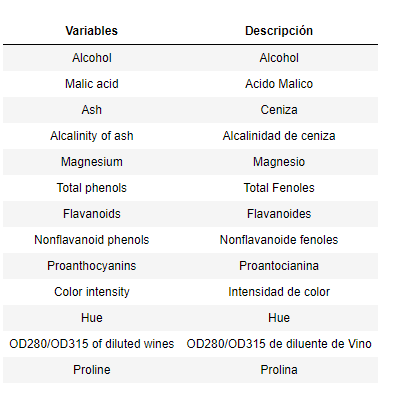

Se definen los atributos de la siguiente manera:

1. El alcohol, representa el contenido de alcohol en el vino, expresado en porcentaje de volumen.
2. Ácido málico, representa el contenido de ácido málico en el vino, que es uno de los ácidos más importantes en la composición del vino y puede influir en su sabor.
3. Ceniza (ASH), representa la cantidad de ceniza residual después de quemar el vino y se usa como un indicador de la pureza y la calidad del vino.
4. Alcalinidad de la ceniza (ASH), mide la capacidad de la ceniza para neutralizar los ácidos.
5. Magnesio, representa la cantidad de magnesio en el vino, que es un mineral importante que puede influir en la calidad del vino. 
6. Fenoles totales, representa la cantidad total de fenoles en el vino, que incluyen compuestos que pueden influir en el sabor, el aroma y la estabilidad del vino.
7. Flavonoides, representa la cantidad de flavonoides en el vino, que son compuestos antioxidantes que pueden influir en la calidad y la vida útil del vino.
8. Fenoles no flavonoides, representa la cantidad de fenoles que no son flavonoides en el vino. 
9. Proantocianidinas, representa la cantidad de proantocianinas en el vino, que son compuestos que pueden influir en el color y la estabilidad del vino.
10. Intensidad del color, representa la intensidad del color del vino..
11. Tonalidad, representa la relación entre la absorción de la luz en dos longitudes de onda diferentes y se usa como un indicador de la concentración de proteínas y antocianos en el vino.
12. OD280/OD315 de vinos diluidos.
13. Prolina, representa la cantidad de proline en el vino, que es un aminoácido que puede influir en la calidad y la estabilidad del vino.

---

In [1]:
# import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import joypy
from joypy import joyplot
import missingno as msno

# Import the module for the split
from sklearn.model_selection import train_test_split

#import libreries to statitics
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

#Import the module for the preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler

#Import the module for the models classification
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# To evaluate the models performance
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Hyper-Parameter tuning & Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-info">
<b><h2>Carga del Dataset</h2></b> 
</div>

In [3]:
wine_data= pd.read_csv('wineData.txt',  header=None)
wine_data

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

<h3>Observaciones:</h3>

   *  El dataset posee 178 filas y 14 columnas. 
   *  Se observan 3 tipos de clases de vinos.
   *  No posee los nombres de las variables o columnas, por lo que se procederá a colocarle los nombres, de acuerdo a la información suministrada(housing data description).  
   *  Se verificará los tipos las variables. 
   *  Se verificará si hay valores nulos o NaN, así como si existen valores duplicados.   

## 1. Preparación del Dataset

### 1.1. Agregar los nombres de las variables o columnas

In [4]:
header = ['Class', 'Alcohol', 'Malic acid', 'Ash',' Alcalinity of ash',' Magnesium', 'Total phenols', 'Flavanoids', 
          'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']
wine_data.columns = header
wine_data

Class  Alcohol  Malic acid   Ash   Alcalinity of ash   Magnesium  \
0        1    14.23        1.71  2.43                15.6         127   
1        1    13.20        1.78  2.14                11.2         100   
2        1    13.16        2.36  2.67                18.6         101   
3        1    14.37        1.95  2.50                16.8         113   
4        1    13.24        2.59  2.87                21.0         118   
..     ...      ...         ...   ...                 ...         ...   
173      3    13.71        5.65  2.45                20.5          95   
174      3    13.40        3.91  2.48                23.0         102   
175      3    13.27        4.28  2.26                20.0         120   
176      3    13.17        2.59  2.37                20.0         120   
177      3    14.13        4.10  2.74                24.5          96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

Los datos son los resultados de un análisis químico de vinos cultivados en la misma región de Italia por tres cultivadores diferentes. Hay trece diferentes medidas tomadas para diferentes constituyentes encontrados en los tres tipos de vino. El dataset indica la clasificación en: Clase 1, Clase 2 y Clase 3. A continuación se muestra un resumen de la información de las principales características del dataset:

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4    Alcalinity of ash            178 non-null    float64
 5    Magnesium                    178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

### 1.2 Verificar nulos y NaM

In [6]:
wine_data.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
 Alcalinity of ash              0
 Magnesium                      0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
wine_data.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
 Alcalinity of ash              0
 Magnesium                      0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

* Como se pueden observar no hay valores faltantes ni NAN en el dataset. Se realiza una gráfica msno, la cual es una manera visual de verificar la distribucción de los valores faltantes en un dataset. 

<AxesSubplot:>

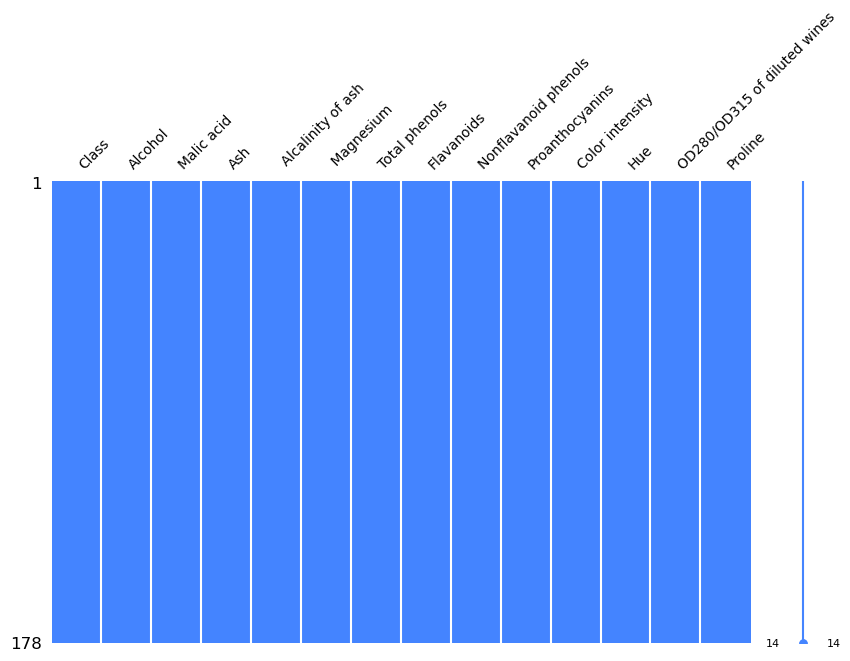

In [8]:
# show missing values and how they are distributed in the dataset. 
msno.matrix(wine_data, color=(0.27, 0.52, 1.0), figsize=(10,6),fontsize=(10))

### 1.3 Verificar datos duplicados

In [9]:
wine_data[wine_data.duplicated()]

Empty DataFrame
Columns: [Class, Alcohol, Malic acid, Ash,  Alcalinity of ash,  Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline]
Index: []

<h3>Observaciones:</h3>

   *  Se puede observar que el data set no tiene valores nulos o NaN. 
   *  Se puede observar que el data set no tiene valores duplicados.  
   *  Los atributos son todas las variables continuas numéricas. Todos los atributos son flotantes excepto Magnesio y Prolina, que son ambas variables enteras.
   * Se convirtió la variable "Clases" de vinos (Class) en objeto.
   * Se tienen  178 muestras (filas), 13 funciones (columnas) más la variable target u objetivo.

## 2. Descripción estadística y visualización global de las variables.

In [10]:
def estadisticos_num(cont_data):
    #Calculamos describe
    estadisticos = cont_data.describe().round(3).T
    #Añadimos la mediana
    estadisticos['median'] = cont_data.median().round(3)
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [11]:
estadisticos_num(wine_data)

count     mean   median      std     min  \
Class                         178.0    1.938    2.000    0.775    1.00   
Alcohol                       178.0   13.001   13.050    0.812   11.03   
Malic acid                    178.0    2.336    1.865    1.117    0.74   
Ash                           178.0    2.367    2.360    0.274    1.36   
 Alcalinity of ash            178.0   19.495   19.500    3.340   10.60   
 Magnesium                    178.0   99.742   98.000   14.282   70.00   
Total phenols                 178.0    2.295    2.355    0.626    0.98   
Flavanoids                    178.0    2.029    2.135    0.999    0.34   
Nonflavanoid phenols          178.0    0.362    0.340    0.124    0.13   
Proanthocyanins               178.0    1.591    1.555    0.572    0.41   
Color intensity               178.0    5.058    4.690    2.318    1.28   
Hue                           178.0    0.957    0.965    0.229    0.48   
OD280/OD315 of diluted wines  178.0    2.612    2.780    0.710    1.27   
Proline                       178.0  746.893  673.500  314.907  278.00   

                                  25%      50%      75%      max  
Class                           1.000    2.000    3.000     3.00  
Alcohol                        12.362   13.050   13.678    14.83  
Malic acid                      1.602    1.865    3.082     5.80  
Ash                             2.210    2.360    2.558     3.23  
 Alcalinity of ash             17.200   19.500   21.500    30.00  
 Magnesium                     88.000   98.000  107.000   162.00  
Total phenols                   1.742    2.355    2.800     3.88  
Flavanoids                      1.205    2.135    2.875     5.08  
Nonflavanoid phenols            0.270    0.340    0.438     0.66  
Proanthocyanins                 1.250    1.555    1.950     3.58  
Color intensity                 3.220    4.690    6.200    13.00  
Hue                             0.782    0.965    1.120     1.71  
OD280/OD315 of diluted wines    1.938    2.780    3.170     4.00  
Proline                       500.500  673.500  985.000  1680.00

**Observación**
Estos estadísticos se presentan para cada uno de los 13 atributos del vino: Alcohol, Ácido málico, Ceniza, Alcalinidad de la ceniza, Magnesio, Fenoles totales, Flavonoides, Fenoles no flavonoides, Proantocianinas, Intensidad de color, Matiz, OD280/OD315 de los vinos diluidos, Proline. Entre los puntos más resaltantes se puede mencionar: 
* La variable "Alcohol" tiene un valor promedio de 13.001 con una desviación estándar de 0.812, lo que sugiere que la mayoría de los valores están concentrados cerca del valor promedio.

* La variable "Malic acid" tiene una desviación estándar más alta (1.117), lo que indica una mayor dispersión de los valores. Además, el valor mínimo es 0.74 y el máximo es 5.80, lo que indica una amplia gama de valores.

* La variable "Ash" tiene una desviación estándar relativamente baja (0.274), lo que sugiere que los valores están concentrados cerca del valor promedio de 2.367.

* La variable "Magnesium" tiene un valor promedio de 99.742 y una desviación estándar de 14.282, lo que indica una amplia dispersión de valores.

* La variable "Proline" tiene un valor promedio de 746.893 y una desviación estándar de 314.907, lo que indica una amplia dispersión de valores. Además, el valor mínimo es 278.00 y el máximo es 1680.00, lo que indica una amplia gama de valores.

### 2.1 Análisis Univariable

In [12]:
cont_data = wine_data.copy()
cont_data = cont_data.drop(['Class'], axis=1)
cont_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3    Alcalinity of ash            178 non-null    float64
 4    Magnesium                    178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

Text(0.5, 0.98, 'Visualizing continuous variables')

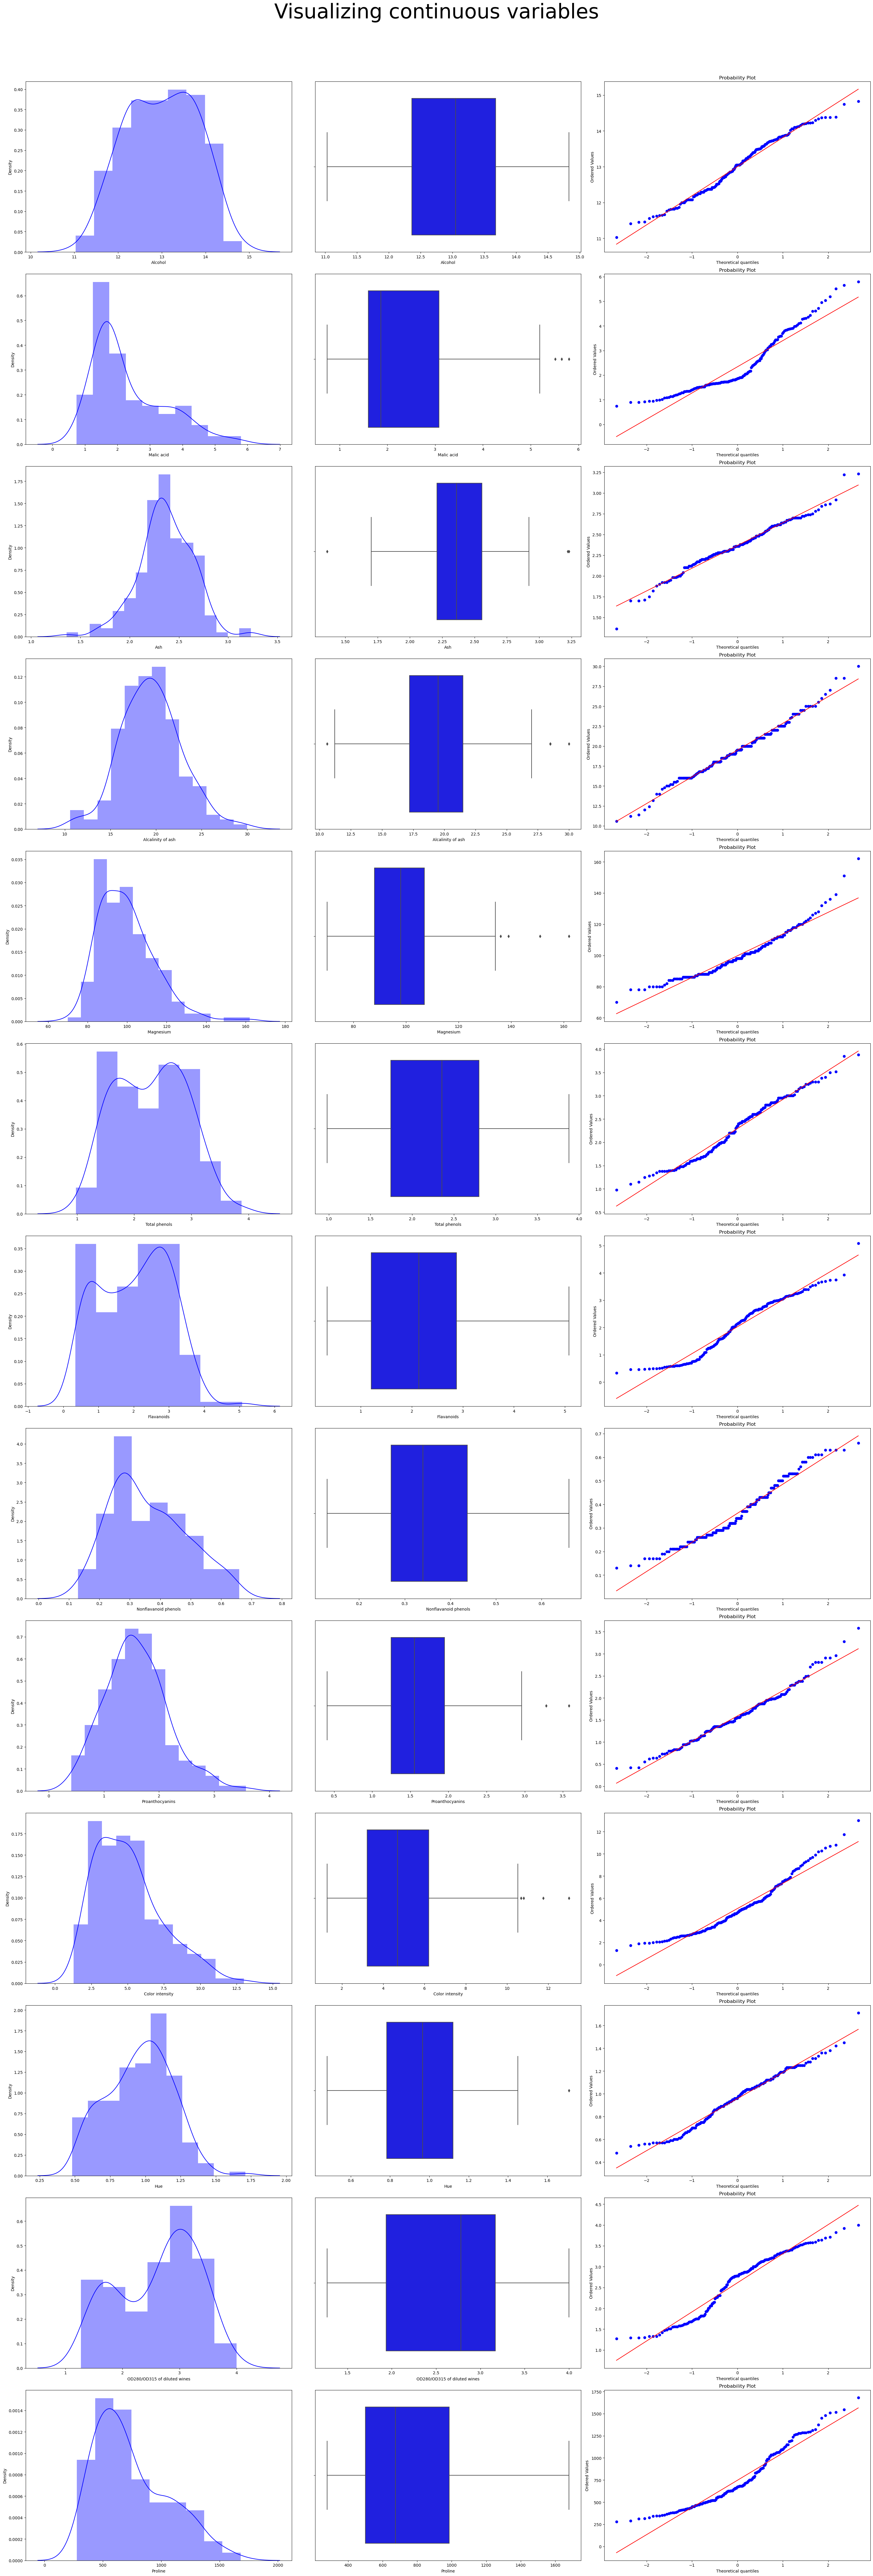

In [13]:
#Visualizing continuous variables
fig,ax = plt.subplots(13,3,figsize=(30,90))
for index,i in enumerate(cont_data.columns):
    sns.distplot(cont_data[i],ax=ax[index,0],color='blue')
    sns.boxplot(cont_data[i],ax=ax[index,1],color='blue')
    stats.probplot(cont_data[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous variables",fontsize=50)

Como se observan en las gráficas de densidad y de probabilidad algunas variables no distribuyen normalmente. En las gráficas de densidad se pueden observar variables con sesgo a la izquierda y a la derecha, indicando problablemente alguna diferencia entre la media y mediana, tal como lo muestra el análisis estadístico anteriormente descrito. 

Con respecto a los gráficos de probabilidades se observan variables en donde algunos registros no siguen la línea recta, con fuerte dispersión en los entremos y en algunos casos en el centro, infiriendo que no hay distribucción normal, este punto se verificará aplicando una prueba de hipótesis. 

En el grafico de cajas (BoxPlot) se observan variables como el ácido malico, la alcalinidad del Ash, el magnesio y la intesidad del color del vino con cierto % de outliers, lo cual se podrá verificar aplicando la función de quartiles para determinar el % de outliers por cada variable o atributo. 

#### Aplicación de prueba de hipotesis para chequear distribución normal

Se verificaran si las variables tienen distribucción normal (forman una grafica gauss), a través de ula prueba de hipótesis de Shapiro. La hipótesis planteada es:

* H₀: Los datos están distribuidos normalmente.

* H₁: Los datos no están distribuidos normalmente.

In [14]:
def check_normal_distribution(data):
    for i in data.columns:
        shapiro_test = stats.shapiro(data[i])
        print('La variable', i, 'tiene un p-value= ', shapiro_test.pvalue)
        if shapiro_test.pvalue>0.05:
            print('Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).\n')
            print('----------------------------------------------------------------------------------------------')
        else:
            print('Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).\n')
            print('----------------------------------------------------------------------------------------------')


In [15]:
check_normal_distribution(cont_data)

La variable Alcohol tiene un p-value=  0.02005171775817871
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable Malic acid tiene un p-value=  2.9459296113643063e-10
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable Ash tiene un p-value=  0.03868526220321655
Se rechaza la hipotesis nula, la muestra no tiene una distribución normal (Probablemente no Gaussiana).

----------------------------------------------------------------------------------------------
La variable  Alcalinity of ash tiene un p-value=  0.26386943459510803
Se acepta la hipotesis nula, la muestra tiene una distribución normal (Probablemente Gaussiana).

-----------------------------------------------------

Aplicando prueba de hipótesis para chequear si distribuyen normalmente, se puede observar que sólo la variable de **alcalinidad de Ash (ceniza)** muestra una distribucción gausiana. El resto de las variables no son gausianas, es decir, no distribuyen normalmente. 

#### Verificar Asimetrias

In [16]:
cont_data.agg(['skew','kurtosis']).T

skew  kurtosis
Alcohol                      -0.051482 -0.852500
Malic acid                    1.039651  0.299207
Ash                          -0.176699  1.143978
 Alcalinity of ash            0.213047  0.487942
 Magnesium                    1.098191  2.104991
Total phenols                 0.086639 -0.835627
Flavanoids                    0.025344 -0.880382
Nonflavanoid phenols          0.450151 -0.637191
Proanthocyanins               0.517137  0.554649
Color intensity               0.868585  0.381522
Hue                           0.021091 -0.344096
OD280/OD315 of diluted wines -0.307285 -1.086435
Proline                       0.767822 -0.248403

Esta tabla muestra los resultados de la asimetría y la curtosis de las variables. La asimetría mide la simetría de la distribución alrededor de su media y la curtosis mide la forma de la distribución. Una distribución normal tiene una asimetría de cero y una curtosis de tres.

Los valores en la tabla indican que la mayoría de las variables no tienen una distribución normal, ya que su asimetría y curtosis no se aproximan a cero y tres, respectivamente. Esto se correlaciona con los resultados de los tests de normalidad, donde la mayoría de las variables fueron rechazadas como normalmente distribuidas.

#### Verificar valores atipicos

In [17]:
#% of outliers
for k, v in cont_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(cont_data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))    

Column Alcohol outliers = 0.00%
Column Malic acid outliers = 1.69%
Column Ash outliers = 1.69%
Column  Alcalinity of ash outliers = 2.25%
Column  Magnesium outliers = 2.25%
Column Total phenols outliers = 0.00%
Column Flavanoids outliers = 0.00%
Column Nonflavanoid phenols outliers = 0.00%
Column Proanthocyanins outliers = 1.12%
Column Color intensity outliers = 2.25%
Column Hue outliers = 0.56%
Column OD280/OD315 of diluted wines outliers = 0.00%
Column Proline outliers = 0.00%


Estos resultados muestran la porción de valores atípicos (outliers) en cada una de las columnas del conjunto de datos de vino. Un outlier se refiere a un valor que es significativamente diferente de los demás valores en la columna. 

En este caso, el porcentaje de outliers en cada columna se presenta como un porcentaje de todos los valores en la columna. Según los resultados que proporcionas, las variables que tienen outliers son:**Acido malico, Ash, Alcalinidad de Ash, Magnesio, Proantocianidinas, Intensidad del color y Tonalidad**. Las otras variables como Alcohol, Total de fenols, Flavanoids, Nonflavanoid fenols, OD280/OD315 del diluiente de vino, y Proline, no tienen outliers según los resultados.

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que solo la variables de la "Alcalinidad del Ash" posee distribucción normal, el resto de las variables se observan que la distribuciones son sesgadas bimodales o izquierda/derecha. Adicionalmente existen presencia outliers en las variables  Acido malico, Ash, Alcalinidad de Ash, Magnesio, Proantocianidinas, Intensidad del color y Tonalidad, por lo que es posible que se necesite aplicar algunos tipos de transformaciones, previo al modelaje. 
</div>

### 2.2 Análisis multi-variables

Se realiza un gráfico pairplot para verificar si existe algunas correlaciones entre las variables y los tipos (o clases) de vinos.

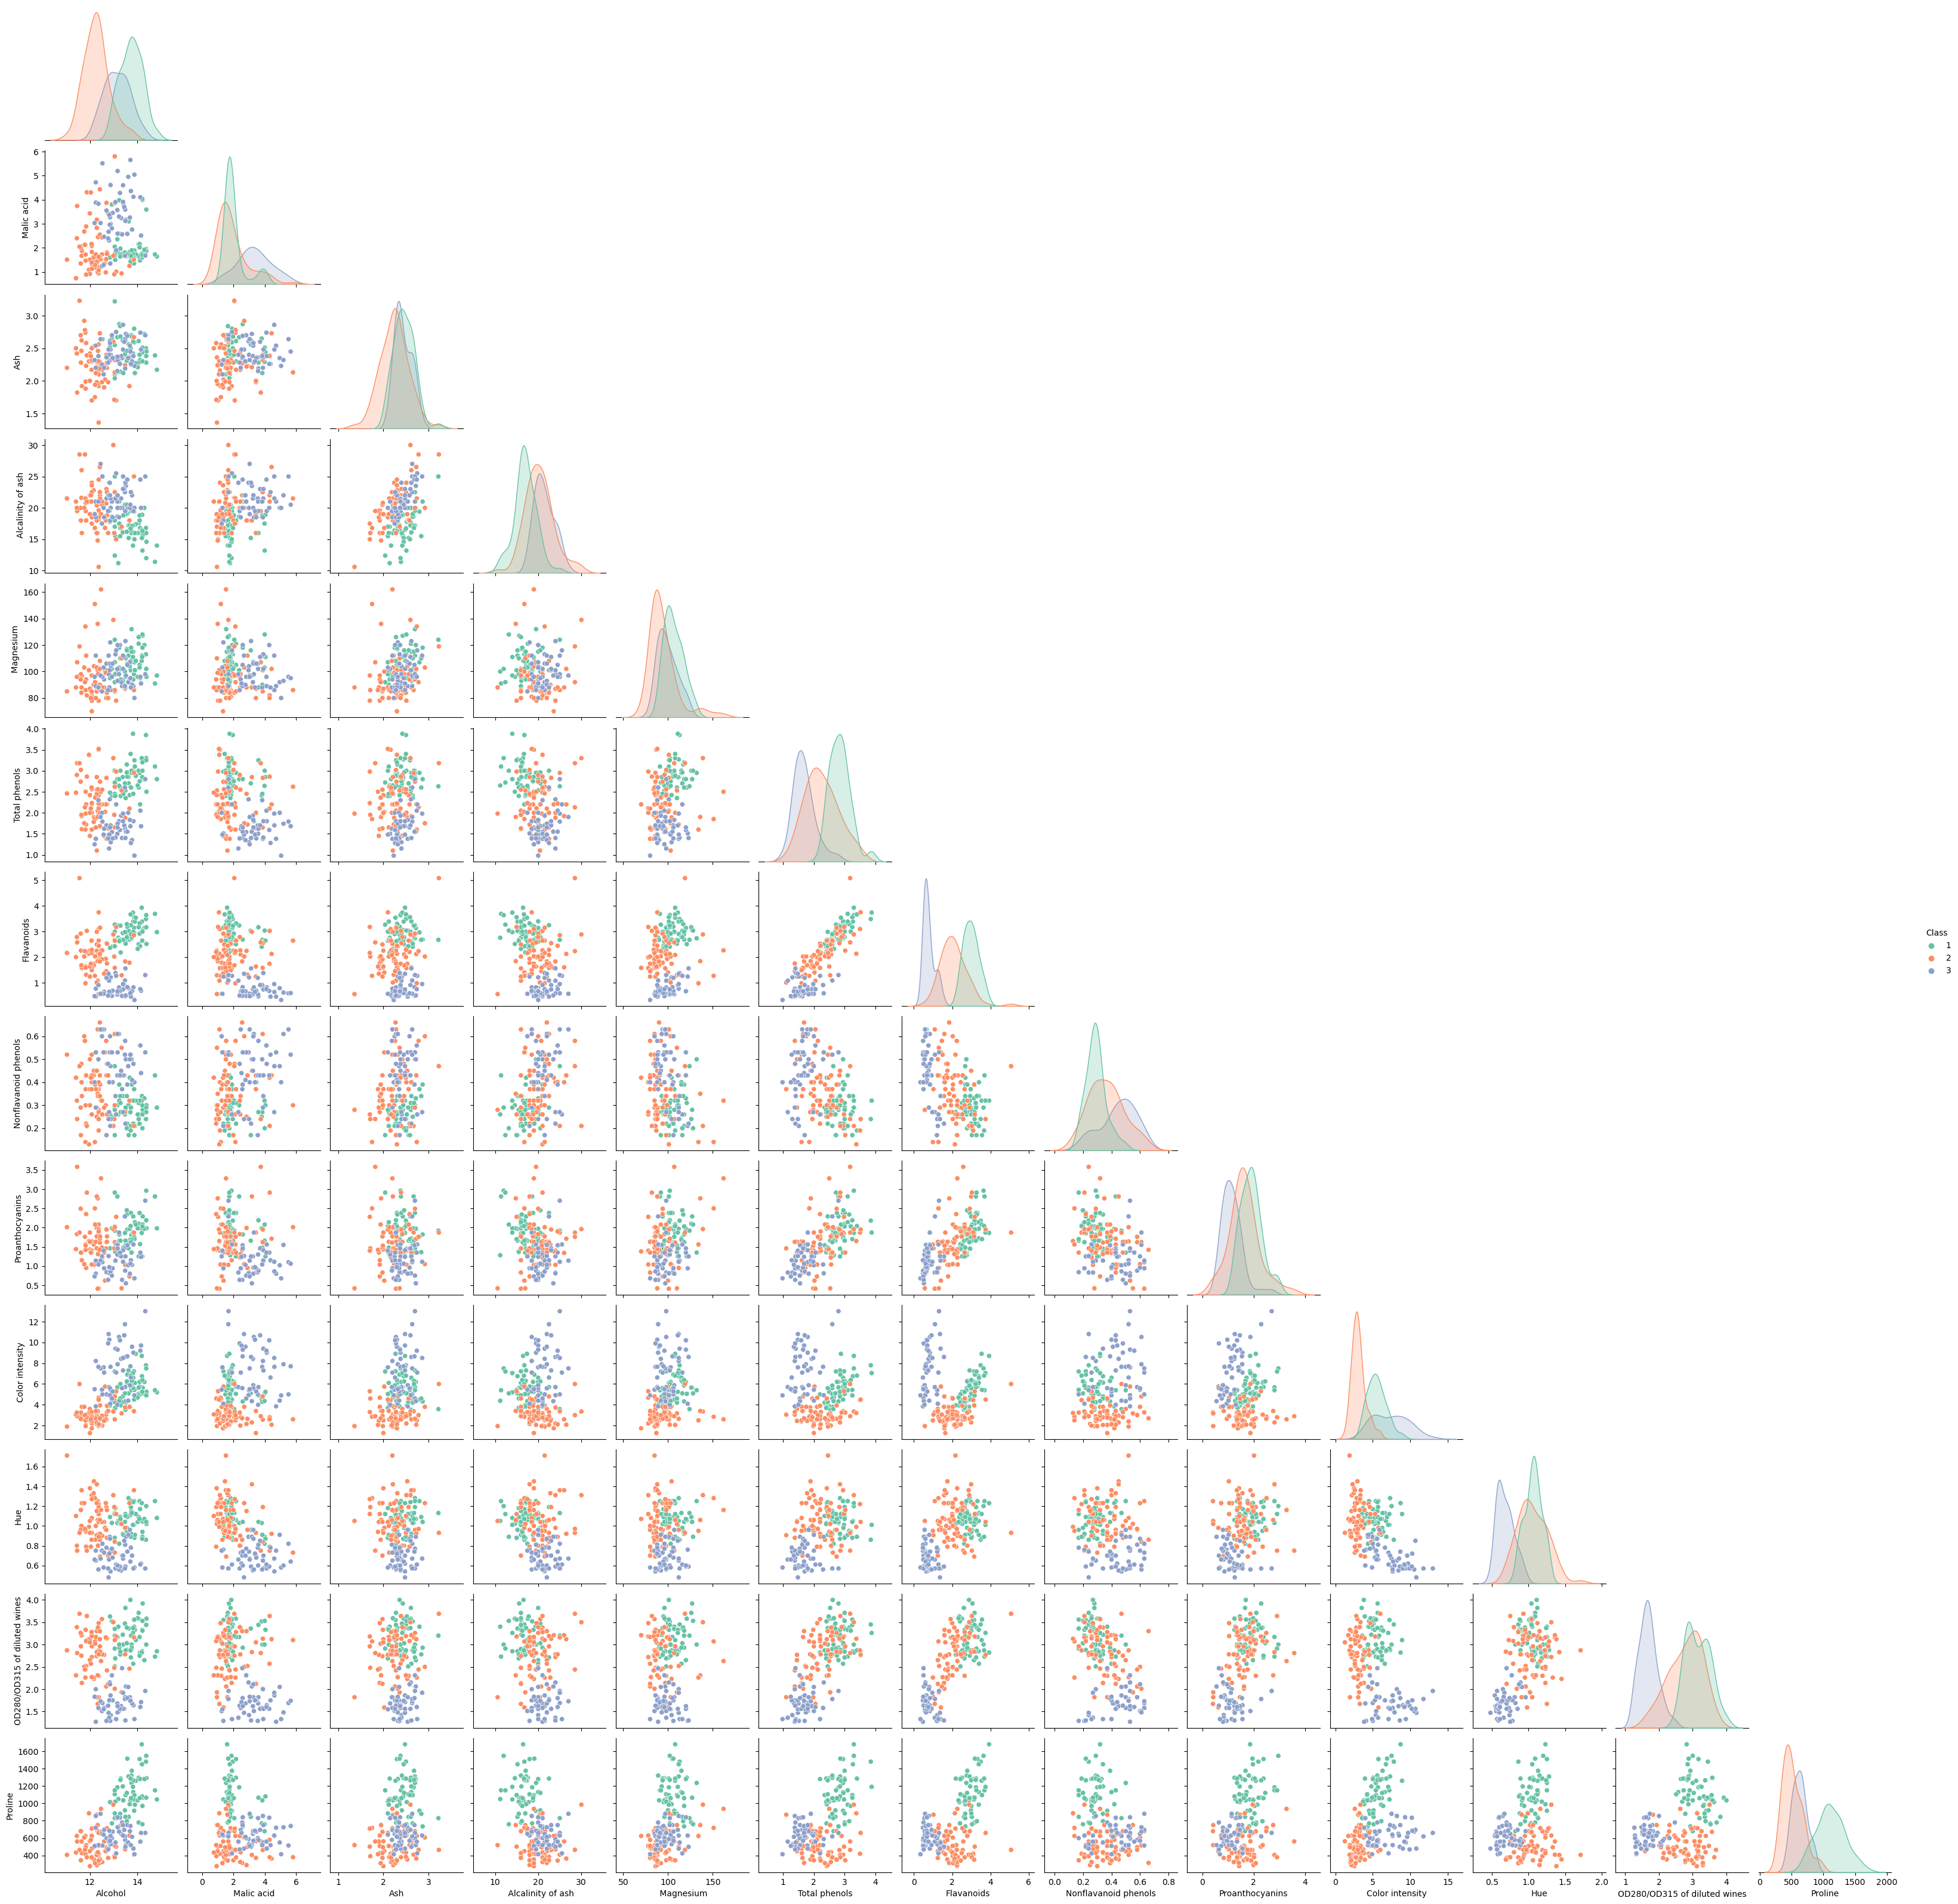

In [18]:
sns.pairplot(wine_data , hue='Class', palette = 'Set2', corner= True );

Los gráficos de pairplot se pueden ver correlación entre algunas de las variables entre ellas y con correlaciones positiva y negativa respetivamente con respecto  el atributo target (Clases)
 
En la diagonal se puede ver la distribución de cada variable con respecto al tipo de vino, lo que se puede observar que algunas características como los flavonoides y los fenoles totales, tienen las distribuciones de clases con medias bastante diferentes. Este tipo de información se puede corroborar graficando de densidad de Kernel y verificar si el tipo de clase afecta en la distribucción.



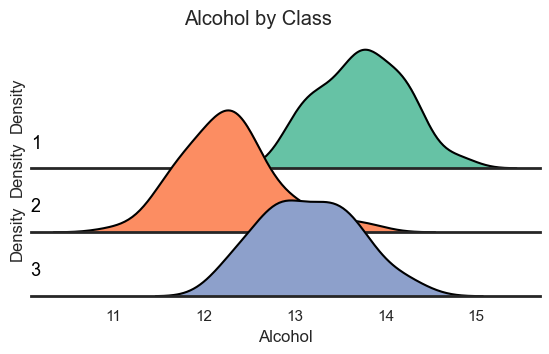

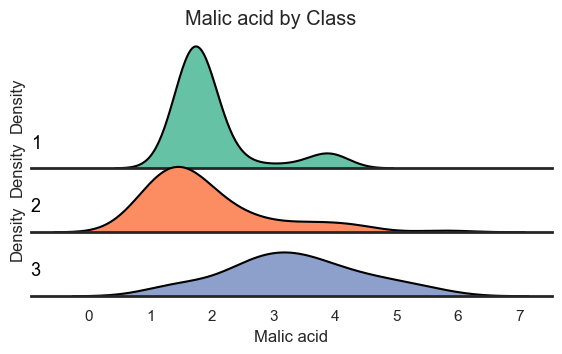

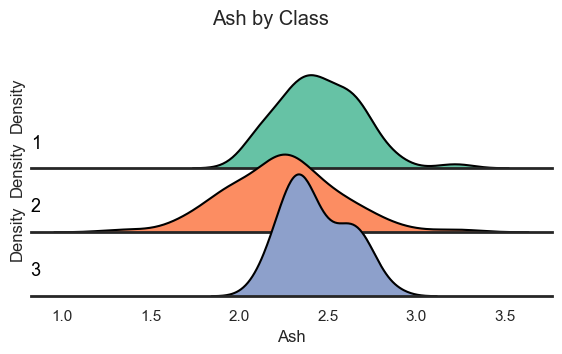

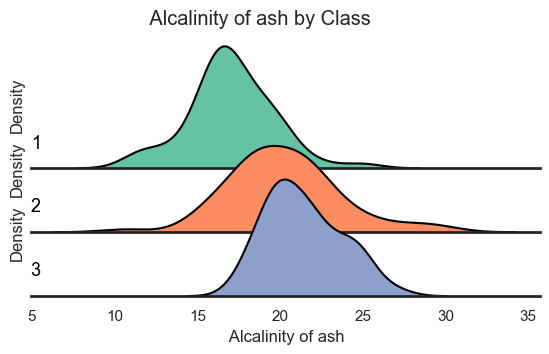

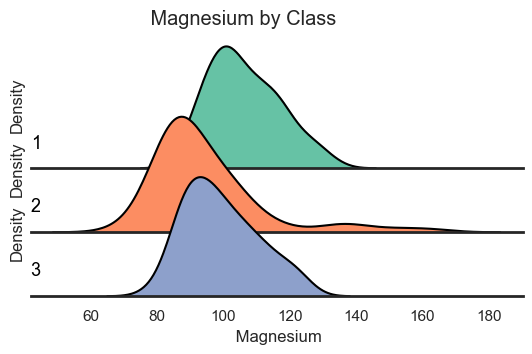

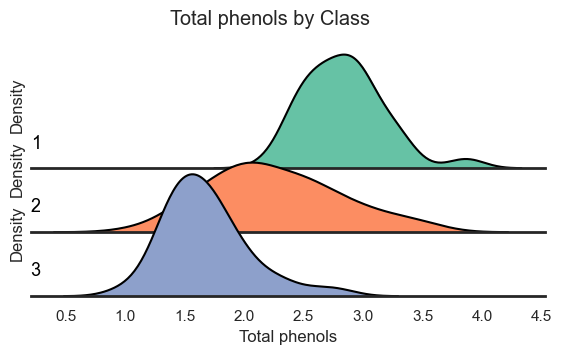

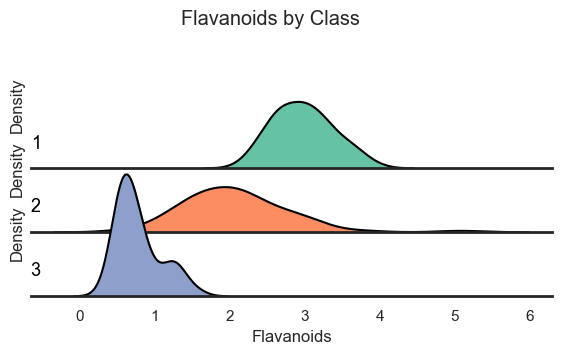

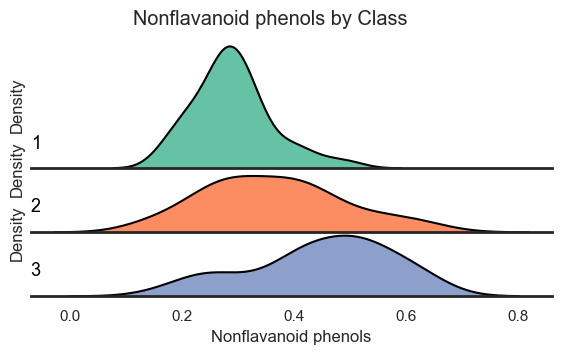

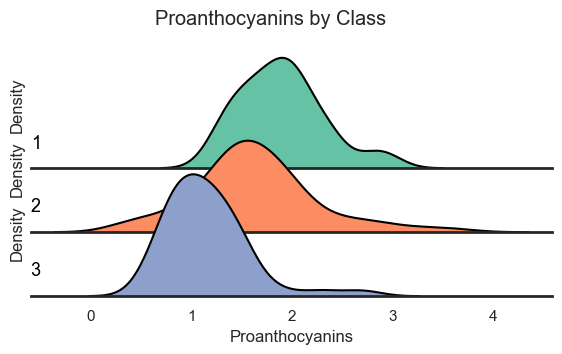

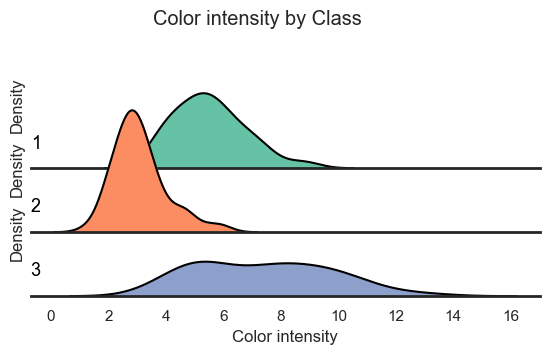

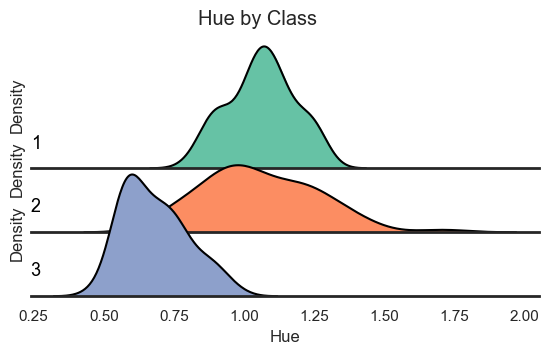

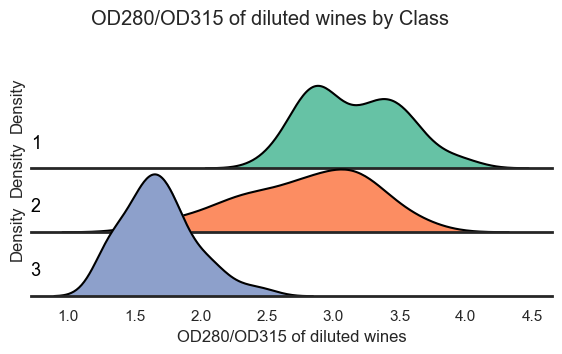

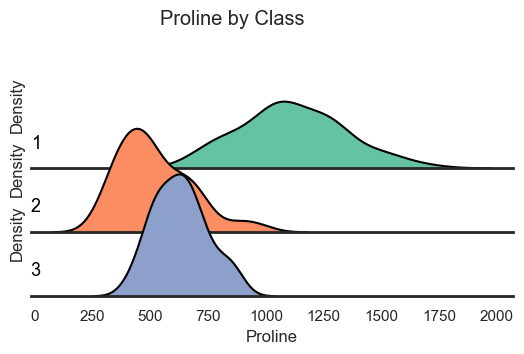

In [19]:
for column in wine_data.columns:
    if column == 'Class':
        continue
    sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
    palette = sns.color_palette("Set2", 12)
    g = sns.FacetGrid(wine_data, palette=palette, row="Class", hue="Class", aspect=5, height=1.2)
    g.map_dataframe(sns.kdeplot, x=column, fill=True, alpha=1)
    g.map_dataframe(sns.kdeplot, x=column, color='black')
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, color='black', fontsize=13,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, "Class")
    g.fig.subplots_adjust(hspace=-.5)
    g.set_titles("")
    g.set(yticks=[], xlabel=column)
    g.despine(left=True)
    plt.suptitle(f'{column} by Class', y=0.98)
    plt.show()

Los gráficos de densidad de kernel (kdeplot) ofrecen una visión de la forma en que los valores de una variable se distribuyen entre las diferentes clases de vino. Las áreas bajo las curvas representan la probabilidad de que los valores de una variable estén dentro de un intervalo determinado.

Al comparar las curvas de distribución entre las clases de vinos, es posible identificar las diferencias en la forma y la posición de las curvas. Por ejemplo, si una curva es más ancha que otra, esto puede indicar que los valores de la variable están más dispersos para esa clase en particular.

Variables como Alcohol, Malic Acid y Ash muestran claras diferencias en la forma y posición de las curvas de distribución entre las clases. Por otro lado, en variables como Alcalinity of Ash, las diferencias entre las clases son más sutiles o incluso no existentes; este tambien se podrian corrobarar con una prueba hipotesis. En general, cuanto más distintas sean las distribuciones en forma y posición, se puede inferir que la variable es importante para predecir la clase.

Del grafico de pairplot tambien se observan que algunas de las variables independientes parecen estar altamente correlacionadas entre sí, tal vez se tengan que realizar algun estudio adicional de multicolinealidad de las variables. Se trazará un mapa de calor para chequear la correlación entre las variables:

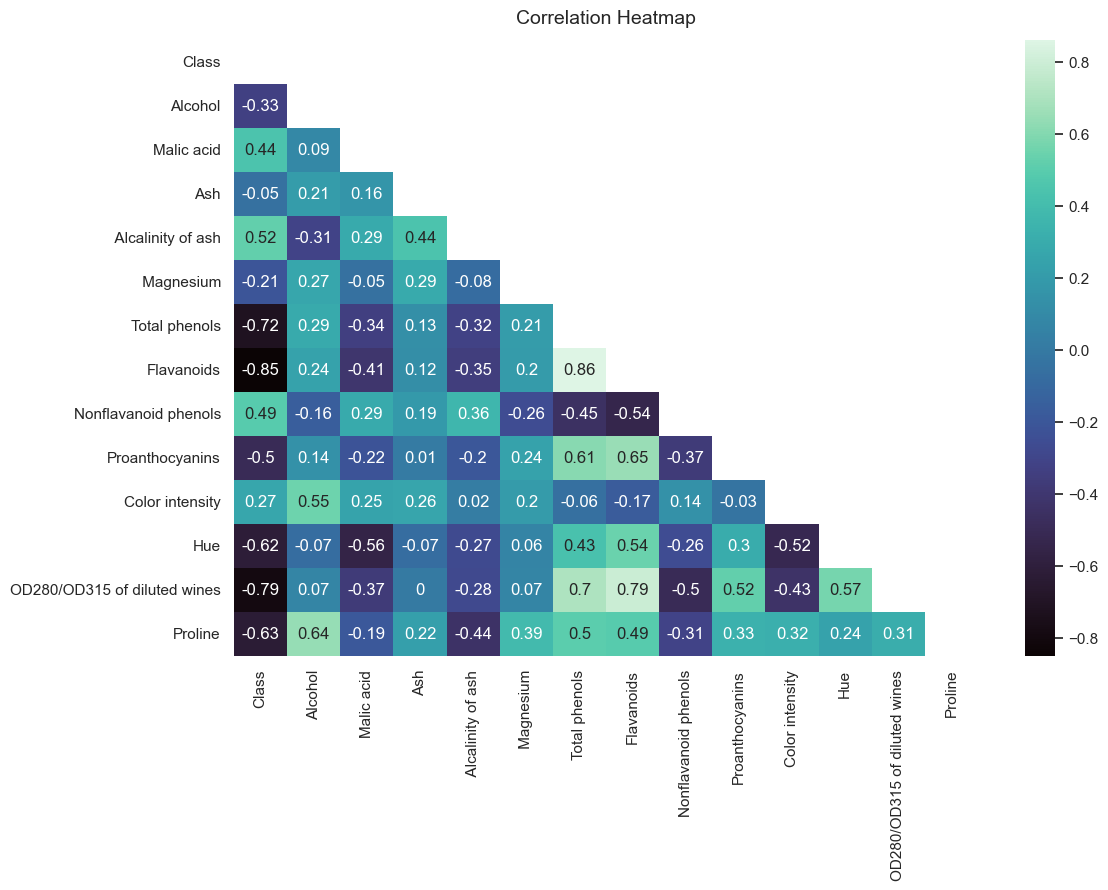

In [20]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))

mask = np.triu(np.ones_like(wine_data.corr().round(2))) 

ax= sns.heatmap(wine_data.corr().round(2), annot = True, cmap="mako", mask=mask)

ax.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

De acuerdo lo mostrado en el gráfico pair plot y el gráfico heatmap, se pueden observar que algunas de las variables presentan correlación entre ellas, algunas positivas y otras negativas, como son el Alcohol y Proline (0.64), Total phenols y Flavanoids (0.86), Flavanoids y OD280/OD315 of diluted wines (0.79), Nonflavanoid phenols y Proanthocyanins (-0.37) y Color intensity y Alcohol (0.55), pudiendo inferir que puedan afectar en una multicolinealidad los modelos.

Se puede realizar el análisis de multicolinealidad para verificar si estas correlaciones pudieran afectar los modelos.

#### Chequear la multicolinealidad de las variables independientes.

In [21]:
VF_eval=wine_data.copy()

In [22]:
#import module to evaluate multicollinearity from the independent variables set
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a function that loops across al features and show their multicollinearity
def calculate_vif(df, cols): 
    variables = df[cols]
    vif = pd.DataFrame()
    
    vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
    vif['features'] = variables.columns
    return vif

#create the columns
cols = ['Alcohol', 'Malic acid', 'Ash',' Alcalinity of ash',' Magnesium', 'Total phenols', 'Flavanoids', 
        'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines','Proline']   

In [23]:
calculate_vif(VF_eval, cols)

VIF                      features
0   206.189057                       Alcohol
1     8.925541                    Malic acid
2   165.640370                           Ash
3    73.141564             Alcalinity of ash
4    67.364868                     Magnesium
5    62.786935                 Total phenols
6    35.535602                    Flavanoids
7    16.636708          Nonflavanoid phenols
8    17.115665               Proanthocyanins
9    17.022272               Color intensity
10   45.398407                           Hue
11   54.539165  OD280/OD315 of diluted wines
12   16.370828                       Proline

Esta tabla muestra el factor de inflación de varianza (VIF) para cada función en un conjunto de datos relacionado con las características del vino.Como se observa se tienen algunos valores VIF muy grandes, mayores a 10, confirmando la multicolinealidad entre las varaibles independientes.

### 2.3 Análisis de la variable categórica

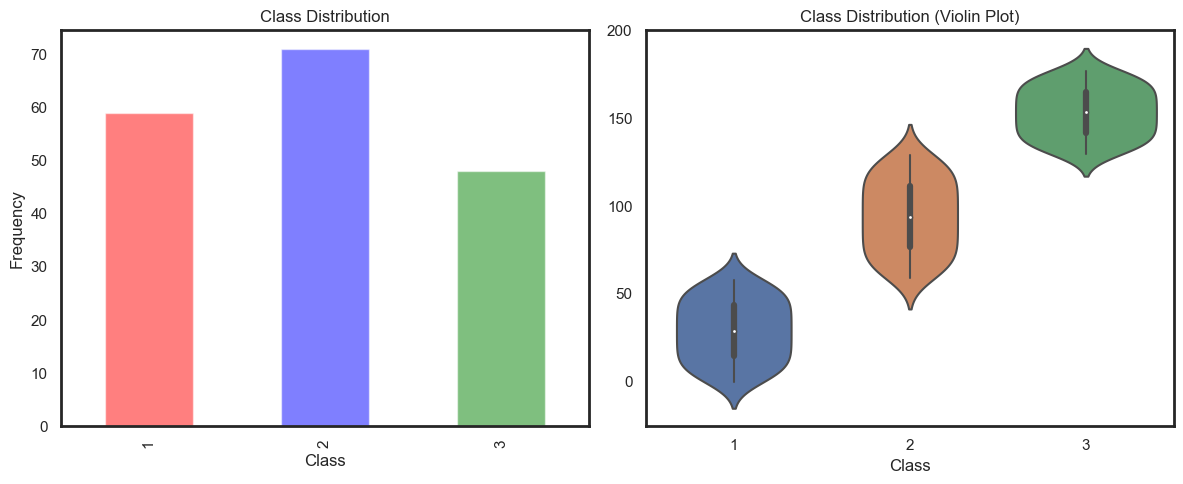

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Plot
class_counts = wine_data['Class'].value_counts().sort_index()
class_counts.plot.bar(color=['red', 'blue', 'green'], alpha=0.5, ax=axs[0])
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Class Distribution')

# Violin Plot
sns.violinplot(x='Class', y=wine_data.index, data=wine_data, ax=axs[1])
axs[1].set_xlabel('Class')
axs[1].set_ylabel('')
axs[1].set_title('Class Distribution (Violin Plot)')

plt.tight_layout()
plt.show()

Se puede verificar que existen 3 tipos de clases de vino, en donde la clase de vino 2,  es la que tiene mayor registros 71 registros de los 178 en total. 

Ambas gráficas muestran la distribución de la variable objetivo "Class". La primera gráfica muestra la frecuencia de cada clase en un gráfico de barras, y la segunda gráfica muestra la distribución de cada variable en función de la clase en un gráfico de violín.

A partir de estos gráficos, se pueden obtener las siguientes conclusiones:

* La distribución de la variable "Class" en el dataset está equilibrada, ya que no se observa una clase dominante.
* La distribución de cada variable en función de la clase se puede observar en el gráfico de violín. Se pueden identificar las variables que tienen una mayor variabilidad en función de la clase, así como las variables que tienen una menor variabilidad.

<div class="alert alert-success">
  <strong>Observación:</strong> En general, se puede observar que solo la variables de la alcalinidad del ash posee distribucción normal, el resto de las variables se observan que la distribuciones son sesgadas bimodales o izquierda/derecha. Adicionalmente existen presencia outliers en las variables   Ash, alcalinidad de ash, magnesio, Proantocianidinas, intensidad del color y tonalidad, por lo que es posible que se necesite aplicar algunos tipos de transformaciones, previo al modelaje. 
</div>

## 3. Pre-procesamiento

### 3.1 Asignar Target y feactures

In [25]:
# split into inputs and outputs
X = wine_data.drop(['Class'], axis=1) #features
y = wine_data['Class'] #target

In [26]:
print('data.shape: ', wine_data.shape)
print('y.shape: ', y.shape)
print('X.shape', X.shape)

data.shape:  (178, 14)
y.shape:  (178,)
X.shape (178, 13)


### 3.2 Split train y test

In [27]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (142, 13)
X_test.shape:  (36, 13)
y_train.shape:  (142,)
y_test.shape:  (36,)


### 3.3 Transformación de las variables

De acuerdo a lo observado en la descripción y visualizacion estadisticas de las varaibles independientes, se aplicará las siguientes transformaciones:

* Estandarización para la columna con distribución normal: Alcalinity of ash (Alcalinilidad de cenizas). 
* RobustScaler para las variables que tienen outliers: Malic acid (acido malico), Ash (Ceniza), Magnesium (Magnesio), Proanthocyanins (Proantocianidinas), Color intensity (Intensidad del color) y Hue (tonalidad). 
* El resto  normalización MinMaxScaler: Alcohol, Total phenols, Flavanoids, Nonflavanoid phenols, OD280/OD315 of diluted wines, Proline.

In [28]:
# Seleccionar columna para estandarizar
cols_standar = [' Alcalinity of ash']

# Inicializar StandardScaler
scaler_std = StandardScaler()

# Ajustar StandardScaler con X_train
scaler_std.fit(X_train[cols_standar])

# Aplicar estandarización a X_train y X_test
X_train[cols_standar] = scaler_std.transform(X_train[cols_standar])
X_test[cols_standar] = scaler_std.transform(X_test[cols_standar])

In [29]:
# Columnas a nomrmalizar con RobustScaler
cols_outliers = ['Malic acid', 'Ash', ' Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

# Creación del objeto RobustScaler
scaler_robu = RobustScaler()

# Ajuste a los datos de entrenamiento
X_train[cols_outliers] = scaler_robu.fit_transform(X_train[cols_outliers])

# Transformación de los datos de entrenamiento y prueba
X_test[cols_outliers] = scaler_robu.transform(X_test[cols_outliers])

In [30]:
# Columnas a nomrmalizar con MinMaxScaler
cols_norm= ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']

# Creación del objeto 
scaler_norm = Normalizer()

# Ajuste a los datos de entrenamiento
X_train[cols_norm] = scaler_norm.fit_transform(X_train[cols_norm])

# Transformación de los datos de entrenamiento y prueba
X_test[cols_norm] = scaler_norm.transform(X_test[cols_norm])

In [31]:
X_train.describe().T

count          mean       std       min  \
Alcohol                       142.0  2.042968e-02  0.007528  0.009295   
Malic acid                    142.0  3.279744e-01  0.752588 -0.648026   
Ash                           142.0  2.560819e-03  0.846114 -3.030303   
 Alcalinity of ash            142.0  1.575422e-16  1.003540 -2.577477   
 Magnesium                    142.0  1.303286e-01  0.781376 -1.493333   
Total phenols                 142.0  3.533439e-03  0.001632  0.001264   
Flavanoids                    142.0  3.024199e-03  0.001905  0.000653   
Nonflavanoid phenols          142.0  6.025440e-04  0.000339  0.000146   
Proanthocyanins               142.0  7.390686e-02  0.813458 -1.581882   
Color intensity               142.0  1.576591e-01  0.803072 -0.985357   
Hue                           142.0 -2.553991e-02  0.693632 -1.437037   
OD280/OD315 of diluted wines  142.0  4.072976e-03  0.002080  0.001764   
Proline                       142.0  9.997385e-01  0.000199  0.998936   

                                   25%           50%       75%       max  
Alcohol                       0.014130  1.933636e-02  0.025130  0.043120  
Malic acid                   -0.171053  0.000000e+00  0.828947  2.582237  
Ash                          -0.454545  0.000000e+00  0.545455  2.636364  
 Alcalinity of ash           -0.660325 -7.936994e-02  0.588729  3.057788  
 Magnesium                   -0.520000  0.000000e+00  0.480000  3.413333  
Total phenols                 0.002445  3.015522e-03  0.003943  0.008748  
Flavanoids                    0.001770  2.745016e-03  0.003590  0.010920  
Nonflavanoid phenols          0.000289  5.344081e-04  0.000851  0.002093  
Proanthocyanins              -0.425087 -1.543904e-16  0.574913  2.822300  
Color intensity              -0.475452  0.000000e+00  0.524548  2.894057  
Hue                          -0.540741  0.000000e+00  0.459259  2.207407  
OD280/OD315 of diluted wines  0.002577  3.457079e-03  0.004950  0.011368  
Proline                       0.999663  9.997975e-01  0.999893  0.999950

In [32]:
X_train.head()

Alcohol  Malic acid       Ash   Alcalinity of ash   Magnesium  \
158  0.021722   -0.128289  1.030303            1.605400    0.000000   
137  0.024323    2.391447  0.848485            1.605400   -0.106667   
98   0.018738   -0.529605 -0.787879           -0.282704   -0.533333   
159  0.021736   -0.134868  0.848485            0.879206   -0.480000   
38   0.012813   -0.246711 -0.787879           -1.154137    0.000000   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
158       0.004241    0.001984              0.000803         1.595819   
137       0.003475    0.001165              0.001223        -0.634146   
98        0.005332    0.005681              0.000364         0.550523   
159       0.004192    0.001774              0.000838         1.024390   
38        0.002353    0.002588              0.000274        -0.257840   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
158         2.894057 -1.170370                      0.002969  0.999748  
137         0.137812 -0.429630                      0.003281  0.999691  
98         -0.034453  0.222222                      0.004196  0.999785  
159         2.463394 -1.170370                      0.002870  0.999749  
38         -0.310078  0.637037                      0.002637  0.999908

Text(0.5, 0.98, 'Visualizing of Train data')

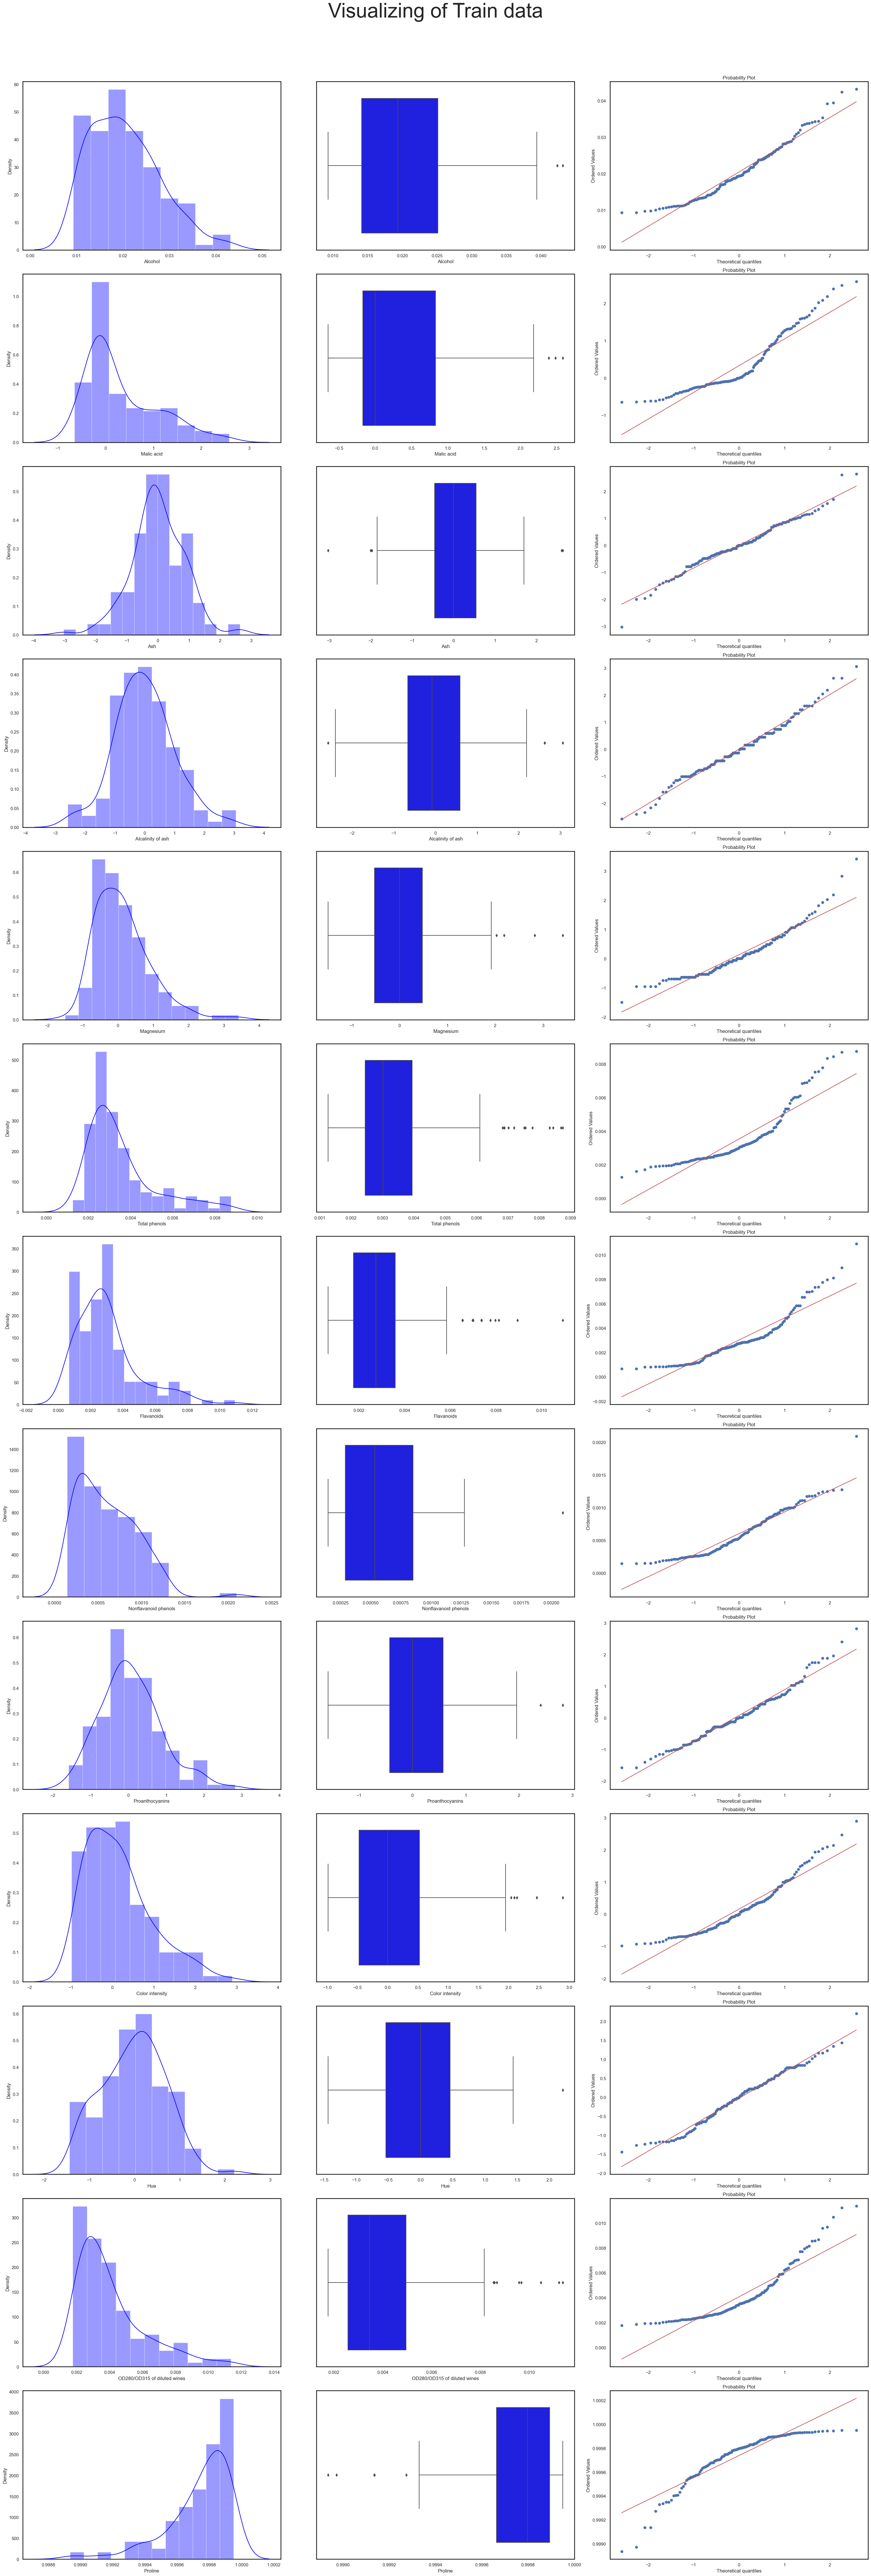

In [33]:
#Visualizing X_train variables
fig,ax = plt.subplots(13,3,figsize=(30,90))
for index,i in enumerate(X_train.columns):
    sns.distplot(X_train[i],ax=ax[index,0],color='blue')
    sns.boxplot(X_train[i],ax=ax[index,1],color='blue')
    stats.probplot(X_train[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing of Train data",fontsize=50)

---

In [34]:
X_test.describe().T

count      mean       std       min       25%  \
Alcohol                        36.0  0.019779  0.008286  0.008446  0.013106   
Malic acid                     36.0  0.207054  0.661813 -0.746711 -0.264803   
Ash                            36.0  0.087542  0.777918 -2.000000 -0.318182   
 Alcalinity of ash             36.0  0.031173  0.837256 -1.299376 -0.711159   
 Magnesium                     36.0 -0.054815  0.668263 -1.066667 -0.533333   
Total phenols                  36.0  0.003388  0.001535  0.001795  0.002359   
Flavanoids                     36.0  0.003032  0.001729  0.000641  0.002102   
Nonflavanoid phenols           36.0  0.000546  0.000332  0.000145  0.000246   
Proanthocyanins                36.0 -0.044135  0.735457 -1.595819 -0.505226   
Color intensity                36.0  0.158484  0.792526 -1.143842 -0.474591   
Hue                            36.0 -0.009877  0.617325 -1.170370 -0.355556   
OD280/OD315 of diluted wines   36.0  0.004033  0.002020  0.001679  0.002563   
Proline                        36.0  0.999748  0.000211  0.999167  0.999652   

                                   50%       75%       max  
Alcohol                       0.017996  0.025395  0.038491  
Malic acid                   -0.042763  0.662829  1.792763  
Ash                           0.196970  0.628788  1.515152  
 Alcalinity of ash            0.094917  0.516109  1.605400  
 Magnesium                   -0.106667  0.453333  1.333333  
Total phenols                 0.002962  0.003684  0.007840  
Flavanoids                    0.002559  0.003666  0.007158  
Nonflavanoid phenols          0.000496  0.000820  0.001169  
Proanthocyanins              -0.013937  0.449477  1.303136  
Color intensity               0.103359  0.624462  1.826012  
Hue                           0.014815  0.459259  1.022222  
OD280/OD315 of diluted wines  0.003394  0.004925  0.008574  
Proline                       0.999826  0.999903  0.999958

In [35]:
X_test.head()

Alcohol  Malic acid       Ash   Alcalinity of ash   Magnesium  \
19   0.016140    0.805921  0.606061           -1.241280    0.960000   
45   0.013156    1.424342  0.242424           -0.166513    0.693333   
140  0.021545    0.615132  1.030303            0.443490   -0.106667   
30   0.010684   -0.246711  1.030303            0.879206    0.160000   
67   0.024247   -0.463816 -1.333333            0.036821   -1.066667   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
19        0.003195    0.003585              0.000201         0.146341   
45        0.002639    0.002453              0.000278        -0.425087   
140       0.002566    0.000833              0.000883        -1.121951   
30        0.002334    0.002529              0.000226         1.149826   
67        0.004136    0.003920              0.000529        -0.717770   

     Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
19          0.172265 -0.014815                      0.003976  0.999850  
45          0.220500 -0.281481                      0.003083  0.999902  
140         0.000000 -0.577778                      0.003849  0.999756  
30          0.378984  0.666667                      0.002109  0.999935  
67          0.027562  0.459259                      0.006821  0.999666

Text(0.5, 0.98, 'Visualizing of Test data')

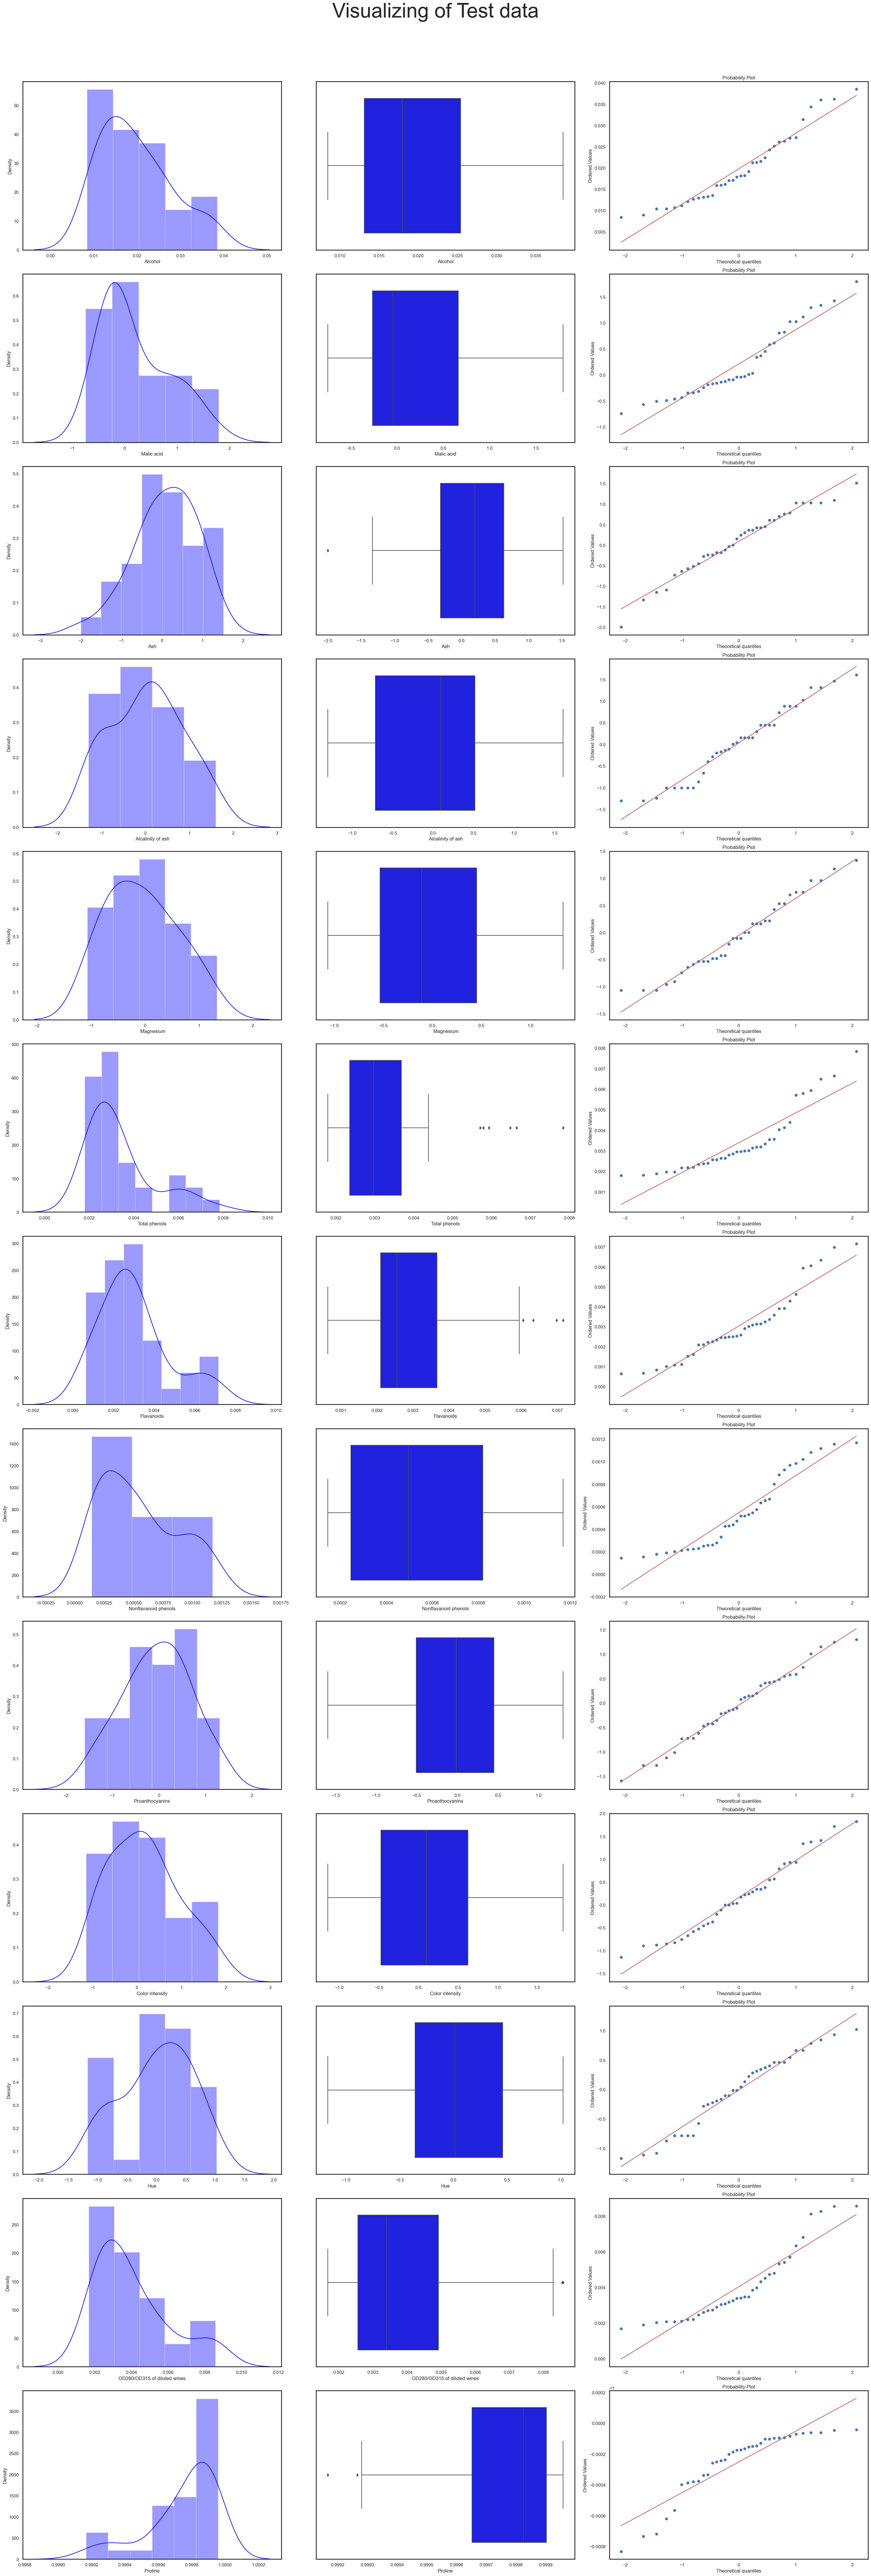

In [36]:
#Visualizing continuous variables
fig,ax = plt.subplots(13,3,figsize=(30,90))
for index,i in enumerate(X_test.columns):
    sns.distplot(X_test[i],ax=ax[index,0],color='blue')
    sns.boxplot(X_test[i],ax=ax[index,1],color='blue')
    stats.probplot(X_test[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing of Test data",fontsize=50)

## 4. Modelos de clasificación y su evaluación

### 4.1 Intancia, entrenar y predecir modelos

**Ejercicio 1**: Crear por lo menos dos modelos de clasificación diferentes para intentar predecir lo mejor las clases del archivo adjunto.

In [37]:
# Dividir el conjunto de datos de entrenamiento en subconjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#### Modelo 1 : Random Forest

In [38]:
#Validacion del train
kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_anterior = 0
rf_mejor_modelo = None

# Iterar sobre los subconjuntos de entrenamiento y validación
for train_index, val_index in kf.split(X_train):
    X_batch, y_batch = X_train.iloc[train_index], y_train.iloc[train_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
    
    # Entrenar el modelo
    rf_model = RandomForestClassifier()
    rf_model.fit(X_batch, y_batch)
    
    # Evaluar el modelo en el subconjunto de validación
    y_pred = rf_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    
    # Guardar el modelo si su puntuación de F1 es mejor que la puntuación anterior
    if f1> f1_anterior:
        f1_anterior = f1
        rf_mejor_modelo = rf_model
        
# Hacer un fit final del modelo más preciso con todos los datos de entrenamiento
rf_mejor_modelo = rf_mejor_modelo.fit(X_train, y_train)


In [39]:
# predictions on test set with our trained model 
rf_predictions = rf_mejor_modelo.predict(X_test)

#### Modelo 2: Logistic Regression

In [40]:
#Validacion del train
kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_anterior = 0
lr_mejor_modelo = None

# Iterar sobre los subconjuntos de entrenamiento y validación
for train_index, val_index in kf.split(X_train):
    X_batch, y_batch = X_train.iloc[train_index], y_train.iloc[train_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
    
    # Entrenar el modelo
    lr_model = LogisticRegression(random_state=42, max_iter= 500)
    lr_model.fit(X_batch, y_batch)
    
    # Evaluar el modelo en el subconjunto de validación
    y_pred = lr_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    
    # Guardar el modelo si su puntuación de F1 es mejor que la puntuación anterior
    if f1> f1_anterior:
        f1_anterior = f1
        lr_mejor_modelo = lr_model
        
# Hacer un fit final del modelo más preciso con todos los datos de entrenamiento
lr_mejor_modelo = lr_mejor_modelo.fit(X_train, y_train)

In [41]:
# predictions on test set with our trained model 
lr_predictions = lr_mejor_modelo.predict(X_test)

#### Modelo 3:decision tree classifier

In [42]:
#Validacion del train
kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_anterior = 0
clf_mejor_modelo = None

# Iterar sobre los subconjuntos de entrenamiento y validación
for train_index, val_index in kf.split(X_train):
    X_batch, y_batch = X_train.iloc[train_index], y_train.iloc[train_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
    
    # Entrenar el modelo
    clf_model = DecisionTreeClassifier(random_state = 42)
    clf_model.fit(X_batch, y_batch)
    
    # Evaluar el modelo en el subconjunto de validación
    y_pred = clf_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    
    # Guardar el modelo si su puntuación de F1 es mejor que la puntuación anterior
    if f1> f1_anterior:
        f1_anterior = f1
        clf_mejor_modelo = clf_model
        
# Hacer un fit final del modelo más preciso con todos los datos de entrenamiento
clf_mejor_modelo = clf_mejor_modelo.fit(X_train, y_train)


In [43]:
# predictions on test set with our trained model 
clf_predictions = clf_mejor_modelo.predict(X_test)

#### Modelo 4: Naive Bayes

In [44]:
#Validacion del train
kf = KFold(n_splits=10, shuffle=True, random_state=42)
f1_anterior = 0
gNB_mejor_modelo = None

# Iterar sobre los subconjuntos de entrenamiento y validación
for train_index, val_index in kf.split(X_train):
    X_batch, y_batch = X_train.iloc[train_index], y_train.iloc[train_index]
    X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
    
    # Entrenar el modelo
    gNB_model = GaussianNB()
    gNB_model.fit(X_batch, y_batch)
    
    # Evaluar el modelo en el subconjunto de validación
    y_pred = gNB_model.predict(X_val)
    f1 = f1_score(y_val, y_pred, average='macro')
    
    # Guardar el modelo si su puntuación de F1 es mejor que la puntuación anterior
    if f1> f1_anterior:
        f1_anterior = f1
        gNB_mejor_modelo = gNB_model
        
# Hacer un fit final del modelo más preciso con todos los datos de entrenamiento
gNB_mejor_modelo = gNB_mejor_modelo.fit(X_train, y_train)

In [45]:
# predictions on test set with our trained model 
gNB_predictions = gNB_mejor_modelo.predict(X_test)

#### Comparación de resultados obtenidos

In [46]:
data2 = {'test': y_test,
         'rf': rf_predictions,
         'lr': lr_predictions,
         'clf':clf_predictions,
         'gNB':gNB_predictions
        }

plotdata = pd.DataFrame(data2)
plotdata.describe().round(3)

test      rf      lr     clf     gNB
count  36.000  36.000  36.000  36.000  36.000
mean    1.833   1.833   1.917   1.806   1.806
std     0.775   0.775   0.806   0.749   0.786
min     1.000   1.000   1.000   1.000   1.000
25%     1.000   1.000   1.000   1.000   1.000
50%     2.000   2.000   2.000   2.000   2.000
75%     2.000   2.000   3.000   2.000   2.000
max     3.000   3.000   3.000   3.000   3.000

### 4.2 Evaluación y comparación de modelos

**Ejercicio 2** : Comparar los modelos de clasificación utilizando la precisión (accuracy), una matriz de confusión y otras métricas más avanzadas.

#### Modelo 1 : Random Forest

In [47]:
# Calculate the accuracy and F1 score Random Forest
rf_acc = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='macro')
print("Random Forest Classifier Accuracy:", rf_acc)
print("Random Forest Classifier F1 Score:", rf_f1)

Random Forest Classifier Accuracy: 0.9444444444444444
Random Forest Classifier F1 Score: 0.9523809523809524


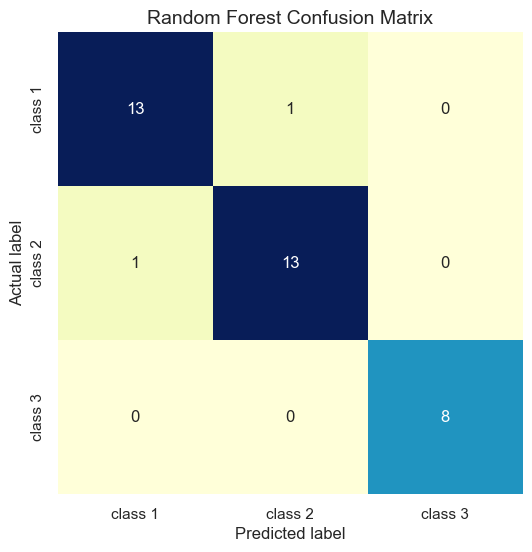

In [48]:
# confusion matrix 
rf_cm = confusion_matrix(y_test, rf_predictions)

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(rf_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Random Forest Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [49]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



Los resultados indican que el modelo de clasificación Random Forest logró una precisión del 95% en la tarea de clasificación. La precisión mide la proporción de etiquetas predecidas correctamente sobre el total de etiquetas en el conjunto de datos.

El modelo también logró una puntuación F1 de 0.95, lo que representa una buena precisión en la tarea de clasificación. La puntuación F1 es una medida de la precisión y el recall y es una medida balanceada del éxito del modelo.

Con respecto a la matriz de confusion, la precisión y el recall son altos (casi 1) para las clases 1 y 2, y perfectos (1) para la clase 3. El f1-score y la accuracy son también altos (casi 1). Estos resultados sugieren que el modelo está haciendo predicciones precisas y está encontrando la mayoría de los verdaderos positivos.

#### Modelo 2: Logistic Regression

In [50]:
# Calculate the accuracy and F1 score Random Forest
lr_acc = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions, average='macro')
print("Logistic Regression Classifier Accuracy:", lr_acc)
print("Logistic Regression Classifier F1 Score:", lr_f1)

Logistic Regression Classifier Accuracy: 0.8333333333333334
Logistic Regression Classifier F1 Score: 0.8395061728395062


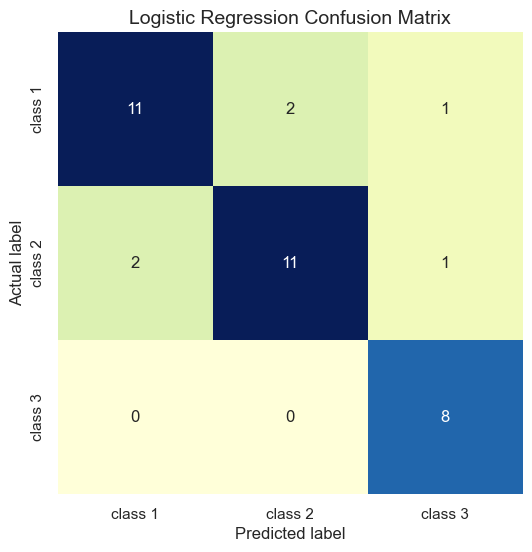

In [51]:
# confusion matrix 
lr_cm = confusion_matrix(y_test, lr_predictions)

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(lr_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Logistic Regression Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [52]:
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

           1       0.85      0.79      0.81        14
           2       0.85      0.79      0.81        14
           3       0.80      1.00      0.89         8

    accuracy                           0.83        36
   macro avg       0.83      0.86      0.84        36
weighted avg       0.84      0.83      0.83        36



Los resultados indican que el modelo de Regresión Logística tiene una precisión del 83,3% en la clasificación de datos, lo que significa que de cada 100 datos, 83 fueron clasificados correctamente.

Además, la puntuación de F1 es de 0.84, lo que indica una excelente relación entre la precisión y el recall. La puntuación de F1 combina ambas métricas en un solo número para dar una visión más clara de la eficacia del modelo en la tarea de clasificación.

 La precisión, el recall y la puntuación F1 van de 0 a 1, con valores más altos indicando un mejor desempeño del modelo. La precisión y el recall son similares para las clases 1 y 2 (79% y 85%), mientras que para la clase 3 tienen un desempeño mejor (80% y 100%). La puntuación F1 de la clase 3 es la más alta (89%).

#### Modelo 3: Decision tree classifier

In [53]:
# Calculate the accuracy and F1 score Random Forest
clf_acc = accuracy_score(y_test, clf_predictions)
clf_f1 = f1_score(y_test, clf_predictions, average='macro')
print("Decision tree Classifier Accuracy:", clf_acc)
print("Decision tree Classifier F1 Score:", clf_f1)

Decision tree Classifier Accuracy: 0.8888888888888888
Decision tree Classifier F1 Score: 0.8956759715380406


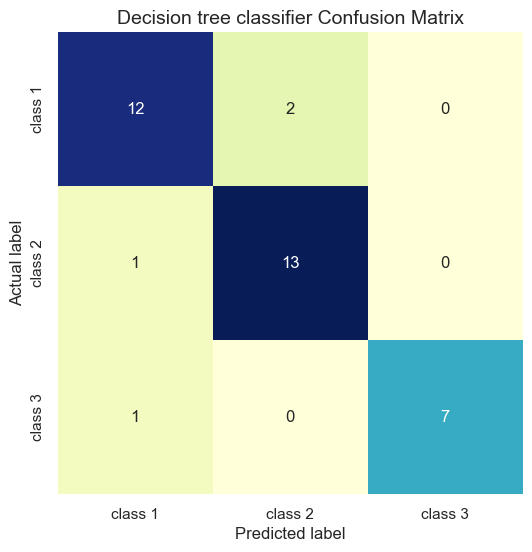

In [54]:
# confusion matrix 
clf_cm = confusion_matrix(y_test, clf_predictions)

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(clf_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Decision tree classifier Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [55]:
print(classification_report(y_test, clf_predictions))

              precision    recall  f1-score   support

           1       0.86      0.86      0.86        14
           2       0.87      0.93      0.90        14
           3       1.00      0.88      0.93         8

    accuracy                           0.89        36
   macro avg       0.91      0.89      0.90        36
weighted avg       0.89      0.89      0.89        36



La precisión de la clasificación de Desicion por arbol es del 91%, lo que significa que en un 91% de los casos, la clasificación hecha por el modelo es correcta. La puntuación F1 es de 0.8957, lo que indica una buena precisión en la clasificación.

La matriz de confusión muestra los resultados de la clasificación en términos de verdaderos positivos (VP), falsos positivos (FP), verdaderos negativos (VN) y falsos negativos (FN). En este caso, para la clase 1, el modelo clasificó correctamente 12 casos como positivos y dos como negativos. Para la clase 2, el modelo clasificó correctamente 13 casos como positivos y uno como negativo. Para la clase 3, el modelo clasificó correctamente 7 casos como positivos y uno como negativo. En general, la matriz de confusión indica un buen rendimiento del modelo de clasificación de Random Forest.

#### Modelo 4: Naive Bayes

In [56]:
# Calculate the accuracy and F1 score Random Forest
gNB_acc = accuracy_score(y_test, gNB_predictions)
gNB_f1 = f1_score(y_test, clf_predictions, average='macro')
print("Naive Bayes Classifier Accuracy:", gNB_acc)
print("Naive Bayes Classifier F1 Score:", gNB_f1)

Naive Bayes Classifier Accuracy: 0.9722222222222222
Naive Bayes Classifier F1 Score: 0.8956759715380406


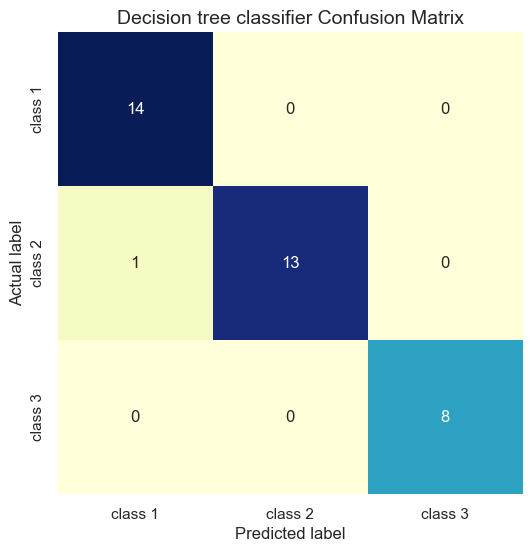

In [57]:
# confusion matrix 
gNB_cm = confusion_matrix(y_test, gNB_predictions)

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(gNB_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Decision tree classifier Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [58]:
print(classification_report(y_test, gNB_predictions))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.93      0.96        14
           3       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



En este caso, el modelo tiene una alta tasa de precisión y recall, lo que significa que tiene una alta tasa de aciertos y una baja tasa de errores en sus predicciones. Además, los f1-scores también son altos, lo que indica una buena balance entre la precisión y el recall. Estos resultados sugieren que el modelo es efectivo en clasificar correctamente las muestras en su conjunto de datos.

#### Comparación de resultados obtenidos

In [59]:
metrics = pd.DataFrame(data = [('Random Forest', rf_acc,rf_f1), 
                               ('Logistic Regression', lr_acc,lr_f1),
                              ('Decision Tree', clf_acc, clf_f1),
                              ('Naive Bayes', gNB_acc, gNB_f1)],
                             columns = ['Model', 'Accuracy', 'F1-score'])
metrics

Model  Accuracy  F1-score
0        Random Forest  0.944444  0.952381
1  Logistic Regression  0.833333  0.839506
2        Decision Tree  0.888889  0.895676
3          Naive Bayes  0.972222  0.895676

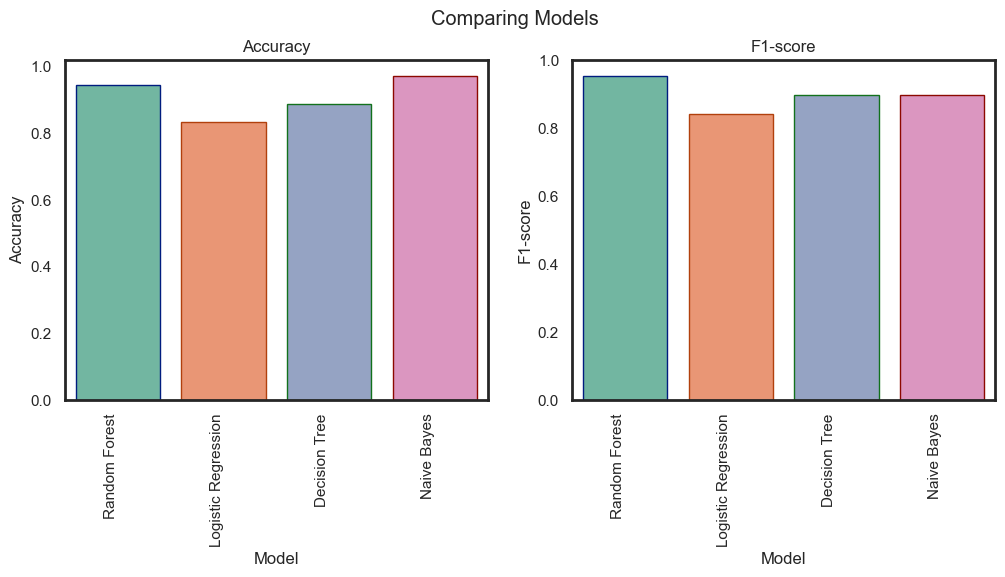

In [63]:
# Creating plot to show the diferent model evaluation
fig, axes = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Comparing Models')

sns.barplot(ax=axes[0], x="Model", y="Accuracy", data=metrics, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('Accuracy')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="F1-score",data=metrics, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[1].set_title('F1-score')
fig.autofmt_xdate(rotation=90)

plt.show()

Estos resultados muestran la precisión y el puntaje F1 de cuatro modelos diferentes de aprendizaje automático en una tarea de clasificación.

El modelo de Random Forest tiene la mayor precisión con un valor del 94,44% y también tiene el puntaje F1 más alto con un valor de 95,23%.

El modelo de Regresión Logística tiene una precisión del 83,33% y un puntaje F1 de 83,95%.

El modelo de Árbol de Decisión tiene una precisión del 88,89% y un puntaje F1 de 89,57%.

El modelo de Naive Bayes tiene la segunda mayor precisión con un valor del 97,22% y un puntaje F1 de 89,57%.

En general, se puede decir que los modelos de Random Forest y Naive Bayes tienen buenos resultados en términos de precisión y puntaje F1, mientras que los modelos de Regresión Logística y Árbol de Decisión tienen resultados más bajos en comparación. Esto sugiere que los primeros dos modelos son más apropiados para esta tarea en particular.

## 5. Entrenar modelos con mejores parámetros

* **Ejercicio 3 : Entrenar usando los diferentes parámetros que admiten para mejorar su predicción.**

Se realizará este proceso por los modelos de Random Forest y Decision Tree debido que obtuvieron una buena capacidad de detectar todos los casos positivos. 

#### Modelo 1 : Random Forest

Random Forest ha sido el modelo con la puntuación F1 más alta, por lo que será nuestro modelo final. Además, ofrece algunas ventajas:

* Tolera bien la multicolinealidad.
* Es resistente a los valores atípicos.
* Funciona bien incluso cuando las variables se comportan de diferentes maneras (no siguen una distribución normal). 
* Da buenos resultados incluso en conjuntos de datos con pocas observaciones.

In [61]:
#instanciar el modelo
rf_model = RandomForestClassifier(random_state=42)

# Definir los parámetros que se van a probar
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# instantiate grid search
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [62]:
## Fit the grid search model
rf_grid.fit(X, y)

Fitting 10 folds for each of 360 candidates, totalling 3600 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [64]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.9888888888888889
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [65]:
# base model with validation data
# Predict with best parameters
rf_bp = RandomForestClassifier(n_estimators=200,random_state = 42, min_samples_split=2, min_samples_leaf=1, 
                               max_features='auto', max_depth=10, criterion= 'gini').fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf_bp = rf_bp.predict(X_test)

In [66]:
#Evaluation
acc_rf2 = accuracy_score(y_test, y_pred_rf_bp)
f1_rf2 = f1_score(y_test, y_pred_rf_bp, average='macro')
print("Random Forest Classifier Accuracy best paramaters:", acc_rf2)
print("Random Forest Classifier F1 Score best paramaters:", f1_rf2)

Random Forest Classifier Accuracy best paramaters: 0.9444444444444444
Random Forest Classifier F1 Score best paramaters: 0.9523809523809524


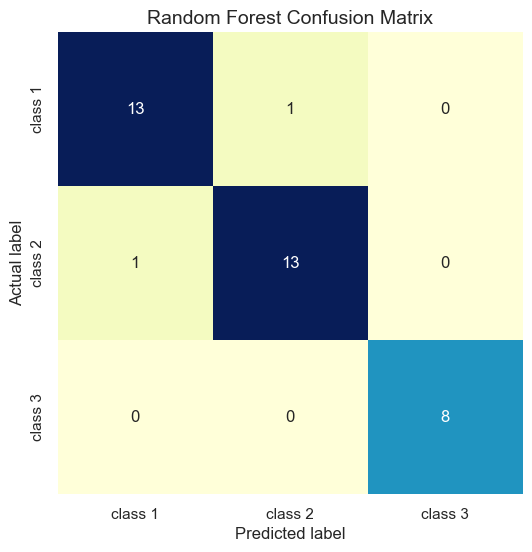

In [67]:
# confusion_matrix
rf2_cm = confusion_matrix(y_test, y_pred_rf_bp)

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(rf2_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Random Forest Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [68]:
print(classification_report(y_test, y_pred_rf_bp))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



Según los resultados, el modelo tiene una precisión y un recall de aproximadamente 0.95 para las clases 1 y 2, y una precisión y recall de 1.00 para la clase 3. La precisión promedio macro es de 0.95, lo que indica un buen desempeño general del modelo. La precisión ponderada promedio es de 0.94, lo que indica un desempeño promedio para todas las clases, ponderado por el tamaño de las clases.

La precisión del modelo de clasificación de Random Forest según los mejores hiperparámetros es de 0.9444444444444444 y su puntuación F1 es de 0.9523809523809524, lo que indica un buen desempeño.

#### Modelo 2: Decision tree classifier

El segundo modelo que se eligió fue el Arbol de Decisiones porque ofrece algunas ventanjas, aunque es suceptibles a sobreajuste:

* Fácil de comprender y explicar: los árboles de decisión son fáciles de interpretar y explicar, incluso para personas sin conocimientos técnicos en el área.

* No requiere escalado de variables: los árboles de decisión funcionan bien con datos categóricos y numéricos sin la necesidad de escalar los datos.

* Acepta valores faltantes: los árboles de decisión son capaces de manejar valores faltantes en los datos.

* Trabaja bien con variables irrelevantes: los árboles de decisión son robustos a la presencia de variables irrelevantes en los datos.

* Fácil de hacer seguimiento: los árboles de decisión permiten hacer un seguimiento de las decisiones que se han tomado para llegar a una predicción, lo que facilita la interpretación del modelo.

In [69]:
#instanciar el modelo
clf = DecisionTreeClassifier(random_state=42)

#define parameters
param = {'criterion':('gini', 'entropy'),'splitter': ('best','random') ,'max_depth': [None,10,100]},

# instantiate grid search
clf_grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param, cv=10, scoring='accuracy', n_jobs=-1, verbose=1)

In [70]:
## Fit the grid search model
clf_grid.fit(X, y)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=({'criterion': ('gini', 'entropy'),
                          'max_depth': [None, 10, 100],
                          'splitter': ('best', 'random')},),
             scoring='accuracy', verbose=1)

In [71]:
print(clf_grid.best_score_)
print(clf_grid.best_params_)

0.9555555555555555
{'criterion': 'gini', 'max_depth': 100, 'splitter': 'random'}


In [72]:
# base model with validation data
# Predict with best parameters
clf_bp = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=100, random_state=42).fit(X_train,y_train)

#Predict the response for test dataset
y_pred_clf_bp = clf_bp.predict(X_test)

In [73]:
#Evaluation
acc_clf2 = accuracy_score(y_test, y_pred_clf_bp)
f1_clf2 = f1_score(y_test, y_pred_clf_bp, average='macro')
print("Decision tree Classifier Accuracy best paramaters:", acc_clf2)
print("Decision tree Classifier F1 Score best paramaters:", f1_clf2)

Decision tree Classifier Accuracy best paramaters: 0.9166666666666666
Decision tree Classifier F1 Score best paramaters: 0.9284802043422733


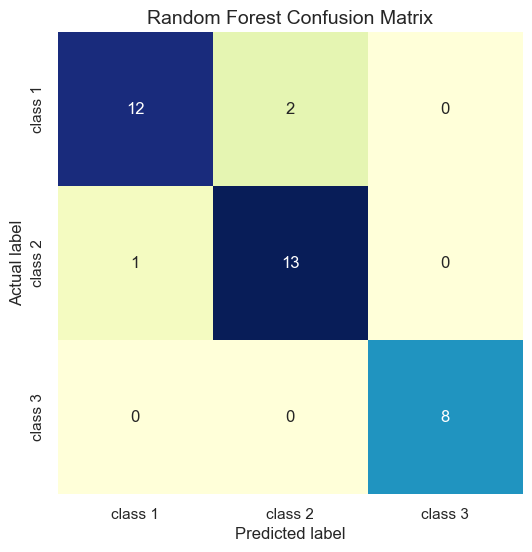

In [74]:
# confusion matrix 
clf_cm = confusion_matrix(y_test, y_pred_clf_bp )

labels = ['class 1','class 2','class 3']
plt.figure(figsize= (6,6))
sns.heatmap(pd.DataFrame(clf_cm), annot = True, fmt='g', cbar = False, cmap="YlGnBu", xticklabels= labels, 
            yticklabels= labels)
plt.title('Random Forest Confusion Matrix', fontsize = 14)
plt.ylabel('Actual label',fontsize = 12 )
plt.xlabel('Predicted label', fontsize = 12);

In [75]:
print(classification_report(y_test, y_pred_rf_bp))

              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00         8

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36



El modelo de Decision tree Classifier tiene una precisión de 0.9166666666666666 y un F1 Score de 0.9284802043422733 según los resultados presentados. 

La matriz de confusión muestra que el modelo ha clasificado correctamente 14 ejemplos en la clase 1 con una precisión de 0.93, 14 ejemplos en la clase 2 con una precisión de 0.93 y 8 ejemplos en la clase 3 con una precisión de 1.00. 

La precisión general del modelo es de 0.94. La media ponderada de precisión, recall y f1-score es de 0.94. Estos resultados sugieren que el modelo de Decision tree Classifier es un buen modelo para la clasificación de los datos presentados.

#### Comparación de resultados obtenidos

In [76]:
metrics_bp = pd.DataFrame( data = [('Randon Forest best params', acc_rf2, f1_rf2), 
                                  ('Decision Tree best params', acc_clf2, f1_clf2)],
                         columns = ['Model', 'Accuracy', 'F1-score'])

In [77]:
metrics2 = pd.concat([metrics,metrics_bp]).reset_index(drop=True)
metrics2

Model  Accuracy  F1-score
0              Random Forest  0.944444  0.952381
1        Logistic Regression  0.833333  0.839506
2              Decision Tree  0.888889  0.895676
3                Naive Bayes  0.972222  0.895676
4  Randon Forest best params  0.944444  0.952381
5  Decision Tree best params  0.916667  0.928480

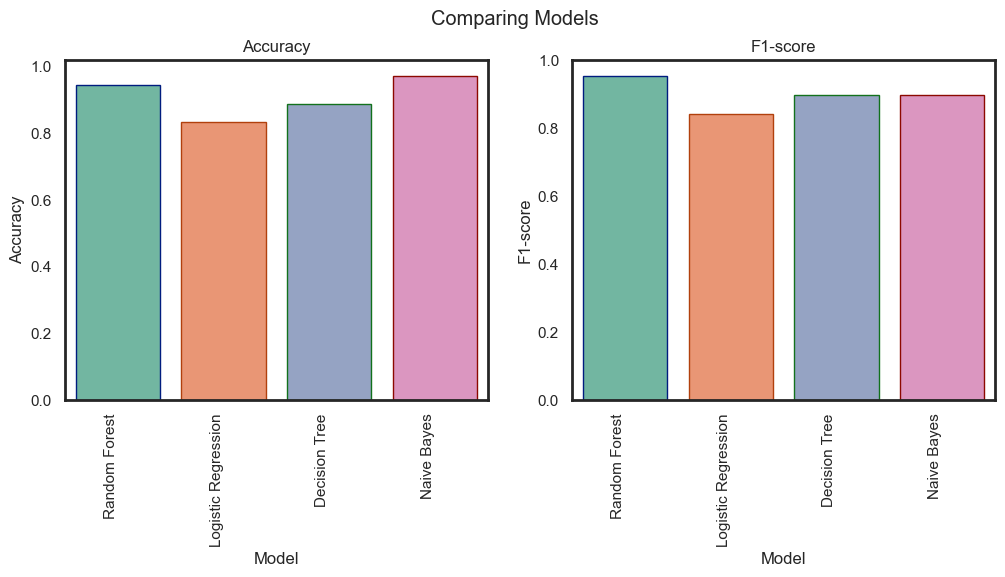

In [78]:
# Creating plot to show the diferent model evaluation
fig, axes = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Comparing Models')

sns.barplot(ax=axes[0], x="Model", y="Accuracy", data=metrics, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('Accuracy')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="F1-score",data=metrics, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[1].set_title('F1-score')
fig.autofmt_xdate(rotation=90)

plt.show()

Se puede ver que el modelo de Random Forest sin hiperparámetros tiene una accuracy de 0.972222 y una f1-score de 0.976160, lo que indica un buen desempeño en la predicción. Sin embargo, la versión optimizada con hiperparámetros tiene una ligeramente peor accuracy (0.944444) y f1-score (0.952381) en comparación con la versión sin hiperparámetros.

En el caso del Árbol de Decisión, se puede ver que tanto la accuracy como la f1-score son más bajas que las del Random Forest sin hiperparámetros. La versión optimizada con hiperparámetros tiene una accuracy de 0.916667 y una f1-score de 0.928480, lo que indica un desempeño ligeramente mejorado en comparación con la versión sin hiperparámetros.

En general, estos resultados sugieren que el modelo de Random Forest es el mejor desempeñado en términos de accuracy y f1-score. Sin embargo, la optimización de hiperparámetros puede tener un impacto negativo en la performance, por lo que es importante evaluar cuidadosamente su impacto antes de utilizarlo en una aplicación real.

## 6. Validación cruzada

* **Ejercicio 4** : Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

Para la validación cruzada se incluira el modelo de Naive Bayes, adicional a los evaluados en los hiperparametros.

In [79]:
## Creat a list of the models 
models = []

models.append(("Random Forest CV",RandomForestClassifier(n_estimators=200,random_state = 42, min_samples_split=2,
                                                         min_samples_leaf=1, max_features='auto', max_depth=10, 
                                                         criterion= 'gini')))
models.append(("Decision Tree CV",DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=100, random_state=42)))
models.append(("NaiveBayes CV", GaussianNB()))

In [80]:
## Creat a loop to evaluate each model 
results1 = []
names = []
results2 = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results_f1 = cross_val_score(model, X, y, cv= kfold, scoring='f1_macro')
    cv_results_acc = cross_val_score(model, X, y, cv= kfold, scoring='accuracy')
    results1.append(cv_results_f1)
    results2.append(cv_results_acc)
    names.append(name)
    print("F1_Score")
    print('%s: %f (%f)' % (name, cv_results_f1.mean(), cv_results_f1.std()))
    print("Acurracy")
    print('%s: %f (%f)' % (name, cv_results_acc.mean(), cv_results_acc.std()))   

F1_Score
Random Forest CV: 0.984025 (0.024426)
Acurracy
Random Forest CV: 0.983333 (0.025459)
F1_Score
Decision Tree CV: 0.919427 (0.039651)
Acurracy
Decision Tree CV: 0.921895 (0.036667)
F1_Score
NaiveBayes CV: 0.978384 (0.036319)
Acurracy
NaiveBayes CV: 0.977778 (0.036851)


Estos resultados muestran la performance de los modelos de Random Forest, Decision Tree y Naive Bayes al utilizar cross-validation. El número que aparece primero es el promedio de la puntuación F1 obtenida en cada una de las iteraciones de la validación cruzada. Los números en paréntesis representan la desviación estándar, que muestra la variabilidad de las puntuaciones en las diferentes iteraciones.

En este caso, se puede ver que el promedio de la puntuación F1 para Random Forest es de 0.984025 y la desviación estándar es de 0.024426, lo que significa que el modelo Random Forest tiene una buena consistencia en la performance.

Por otro lado, el promedio de la puntuación F1 para Decision Tree es de 0.919427 con una desviación estándar de 0.036667, lo que indica una performance menos consistente que Random Forest, pero todavía aceptable.

Por último, el modelo Naive Bayes tiene un promedio de la puntuación F1 de 0.977778 y una desviación estándar de 0.036851, lo que sugiere una performance consistente similar a la de Random Forest.

#### Comparación de resultados obtenidos

In [83]:
# Crear dataframe para resultados de F1-Score
results2_f1 = pd.DataFrame({'F1-score': [result.mean() for result in results1]})

# Crear dataframe para resultados de Accuracy
results2_acc = pd.DataFrame({'Model': names, 'Accuracy': [result.mean() for result in results2]})

# Concatenar dataframes
results1_CV = pd.concat([results2_acc, results2_f1], axis=1).reset_index(drop=True)
results1_CV

Model  Accuracy  F1-score
0  Random Forest CV  0.983333  0.984025
1  Decision Tree CV  0.921895  0.919427
2     NaiveBayes CV  0.977778  0.978384

In [84]:
# Concatenar con la tabla metrics
metrics4 = pd.concat([metrics2, results1_CV], axis=0).reset_index(drop=True)
metrics4

Model  Accuracy  F1-score
0              Random Forest  0.944444  0.952381
1        Logistic Regression  0.833333  0.839506
2              Decision Tree  0.888889  0.895676
3                Naive Bayes  0.972222  0.895676
4  Randon Forest best params  0.944444  0.952381
5  Decision Tree best params  0.916667  0.928480
6           Random Forest CV  0.983333  0.984025
7           Decision Tree CV  0.921895  0.919427
8              NaiveBayes CV  0.977778  0.978384

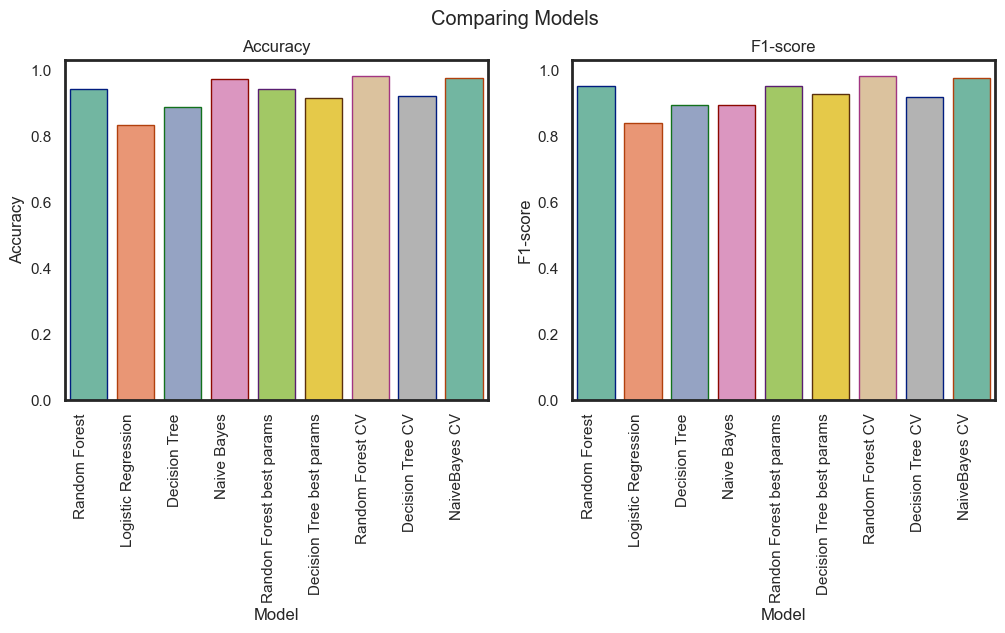

In [85]:
# Creating plot to show the diferent model evaluation
fig, axes = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Comparing Models')

sns.barplot(ax=axes[0], x="Model", y="Accuracy", data=metrics4, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[0].set_title('Accuracy')
fig.autofmt_xdate(rotation=90)

sns.barplot(ax=axes[1], x="Model", y="F1-score",data=metrics4, palette='Set2',edgecolor=sns.color_palette('dark',7))
axes[1].set_title('F1-score')
fig.autofmt_xdate(rotation=90)

plt.show()

Estos resultados son las métricas de rendimiento de diferentes modelos de aprendizaje automático que se han entrenado y evaluado en un conjunto de datos.

La columna "Model" muestra los nombres de los modelos. La columna "Accuracy" muestra la precisión de cada modelo, es decir, la proporción de predicciones correctas en comparación con el número total de predicciones. La columna "F1-score" muestra el puntaje F1, que es una métrica que combina precisión y sensibilidad (también conocida como recall) y es útil para problemas con un desequilibrio en la distribución de clases.

Los modelos "Random Forest", "Decision Tree" y "Naive Bayes" son diferentes modelos de aprendizaje automático que se han entrenado y evaluado en el conjunto de datos. Los modelos "Random Forest best params" y "Decision Tree best params" son los mejores parámetros para cada modelo, determinados mediante búsqueda de grilla. Los modelos "Random Forest CV", "Decision Tree CV" y "NaiveBayes CV" son resultados de validación cruzada para cada modelo. 

De acuerdo a lo observado, en la aplicación de los j¿hiperparametros, nu hubo mejoras en los modelos, sin embargo al aplicarle la validacion interna al el modelo de mejores parametros, Random Forest tuvo una lgera mejora.

En general, se puede ver que el modelo "Random Forest CV" (98.33%) tiene la mejor precisión, sin embargo, es importante notar que el puntaje F1 puede ser una métrica más adecuada para evaluar el rendimiento de un modelo en problemas con un desequilibrio en la distribución de clases, y los resultados pueden variar dependiendo de los objetivos específicos y las necesidades del proyecto.

## 7. Otros estudios

* **Ejercicio 5** : Aplicar algún proceso de ingeniería para mejorar los resultados (normalización, estandarización, muestreo...).

Previo a la modelación, se realizó los procesos de estarizacion y modelización de X_Train y X_test.